In [1]:
import pandas as pd
import numpy as np
import glob
import array
import random
import math


from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D


from sklearn import metrics

from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats as stats
from scipy import signal
from scipy import stats

import scipy.io

#dtw

import dtaidistance
from dtaidistance import preprocessing
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

#ips
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft

from scipy.stats import chisquare


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
import sklearn.cluster
from scipy.stats import chisquare


/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_excel("Prices_Excel/processed_data/CL/company_products/CL_No_Client_companies_product.xlsx") 
data

,My price,Wom / Loyalty,Falabella / Loyalty,Lider / Loyalty,Paris / Loyalty,Abcdin / Loyalty,Claro / Loyalty,Aufbau / Loyalty,Mac Online / Loyalty,Ripley / Loyalty,Movistar / Loyalty
0,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,NaN,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB
1,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,NaN,NaN,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB
2,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB
3,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),NaN,NaN,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G)
4,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),NaN,NaN,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G)
5,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,NaN,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB
6,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,NaN,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB
7,Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),NaN,NaN,Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G)
8,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB
9,Vivo Y16 64GB,NaN,Vivo Y16 64GB,NaN,Vivo Y16 64GB,Vivo Y16 64GB,Vivo Y16 64GB,NaN,NaN,Vivo Y16 64GB,Vivo Y16 64GB


In [3]:
companies=data.columns
companies=companies.tolist()
companies


['My price',
 'Wom / Loyalty',
 'Falabella / Loyalty',
 'Lider / Loyalty',
 'Paris / Loyalty',
 'Abcdin / Loyalty',
 'Claro / Loyalty',
 'Aufbau / Loyalty',
 'Mac Online / Loyalty',
 'Ripley / Loyalty',
 'Movistar / Loyalty']

In [4]:
column_products_A = set(data['Wom / Loyalty'])
column_products_B = set(data['Falabella / Loyalty'])


common_products = column_products_A.intersection(column_products_B)
common_products

{'Apple iPhone 11 128GB',
 'Apple iPhone 11 64GB',
 'Apple iPhone 13 128GB',
 'Apple iPhone 14 128GB ',
 'Apple iPhone 14 256GB ',
 'Apple iPhone 14 512GB',
 'Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Pro 128GB',
 'Apple iPhone 14 Pro 256GB',
 'Apple iPhone 14 Pro Max 128GB ',
 'Apple iPhone 14 Pro Max 256GB ',
 'Motorola Moto E22i  64GB',
 'Samsung Galaxy A23 128GB (5G)',
 'Samsung Galaxy S22 128GB (5G)',
 'Samsung Galaxy S22 256GB (5G)',
 'Samsung Galaxy S23 256GB',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Vivo Y22s 128GB '}

# Function

In [5]:
def list_of_product_common(company1, company2):
    column_products_A = set(data[company1])
    column_products_B = set(data[company2])

    common_products = column_products_A.intersection(column_products_B)
    return common_products

### 'Wom / Loyalty' vs 'Falabella / Loyalty'

In [6]:
company1='Wom / Loyalty' 
company2='Falabella / Loyalty'
common_products=list(list_of_product_common(company1, company2))
common_products

['Samsung Galaxy S22 256GB (5G)',
 'Samsung Galaxy A23 128GB (5G)',
 'Apple iPhone 11 128GB',
 'Vivo Y22s 128GB ',
 'Apple iPhone 14 256GB ',
 'Samsung Galaxy S23 256GB',
 'Apple iPhone 14 128GB ',
 'Apple iPhone 11 64GB',
 'Samsung Galaxy S22 128GB (5G)',
 'Apple iPhone 14 512GB',
 'Apple iPhone 14 Pro Max 128GB ',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Apple iPhone 14 Pro Max 256GB ',
 'Motorola Moto E22i  64GB',
 'Apple iPhone 14 Pro 128GB',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Pro 256GB',
 'Apple iPhone 13 128GB',
 'Apple iPhone 14 Plus 256GB ']

In [7]:
path = "Prices_Excel/processed_data/CL/time_series_processed/"  
list_product = glob.glob(path+ "*.xlsx")
list_product

['Prices_Excel/processed_data/CL/time_series_processed/Vivo Y16 64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Motorola Moto E22i  64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 256GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Samsung Galaxy S22 128GB (5G).xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 11 64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro Max 256GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Plus 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro Max 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro 256GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro 128GB.xlsx',
 'Prices_Excel/processed_data/CL/time_se

In [8]:
df_company1=pd.DataFrame(columns=common_products)
df_company2=pd.DataFrame(columns=common_products)
df_company1

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB


In [9]:
max_len = None  

for i in common_products:
    data = pd.read_excel(path + i + ".xlsx") 
    df_company1[i] = data[company1]
    df_company2[i] = data[company2]
    
    
    current_len = len(data['Date'].tolist()) 
    
    if max_len is None or current_len > max_len:
        max_len = current_len  
        date=data['Date'].tolist()


In [10]:
df_company1.index = date
df_company2.index = date
df_company1.index = pd.to_datetime(df_company1.index, format='%d/%m/%Y')
df_company2.index = pd.to_datetime(df_company2.index, format='%d/%m/%Y')
df_company1= df_company1.sort_index(ascending=True)
df_company2 = df_company2.sort_index(ascending=True)

In [11]:
df_company1

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
2023-01-01,"$696,000","$256,800",-,"$220,800","$1,056,000",NaN,"$948,000","$438,000","$640,800","$1,324,800",-,-,-,-,"$1,198,800","$924,000","$1,072,800",-,"$804,000","$1,192,800"
2023-01-02,"$696,000","$256,800",-,"$220,800","$1,056,000",NaN,"$948,000","$438,000","$640,800","$1,324,800",-,-,-,-,"$1,198,800","$924,000","$1,072,800",-,"$804,000","$1,192,800"
2023-01-03,"$696,000","$256,800",-,"$220,800","$1,056,000",NaN,"$948,000","$438,000","$640,800","$1,324,800",-,-,-,-,"$1,198,800","$924,000","$1,072,800",-,"$804,000","$1,192,800"
2023-01-04,"$696,000","$256,800",-,"$220,800","$1,056,000",NaN,"$948,000","$438,000","$640,800","$1,324,800",-,-,-,-,"$1,198,800","$924,000","$1,072,800",-,"$804,000","$1,192,800"
2023-01-05,"$696,000","$256,800",-,"$220,800","$1,056,000",NaN,"$948,000","$438,000","$640,800","$1,324,800",-,-,-,-,"$1,198,800","$924,000","$1,072,800",-,"$804,000","$1,192,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-16,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2023-12-17,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2023-12-18,"$552,000","$216,000",-,"$150,000","$897,600","$840,000","$865,200","$430,800",-,-,"$1,156,800",-,-,"$76,800","$1,002,000",-,"$1,044,000",-,"$744,000",-
2023-12-19,"$552,000","$216,000",-,"$150,000","$897,600","$840,000","$865,200","$430,800",-,-,"$1,156,800",-,-,"$76,800","$1,002,000",-,"$1,044,000",-,"$720,000",-


In [12]:
df_company2

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
2023-01-01,-,-,"$549,990","$209,990","$1,099,990",NaN,"$949,990","$499,990","$699,990",-,-,"$1,999,990","$1,499,990",-,"$1,199,990","$1,249,990","$1,099,990","$1,349,990","$859,990","$1,249,990"
2023-01-02,-,-,"$549,990","$209,990","$1,099,990",NaN,"$949,990","$499,990","$699,990","$1,389,990",-,"$1,999,990","$1,499,990",-,-,"$1,249,990","$1,099,990","$1,349,990","$859,990","$1,249,990"
2023-01-03,-,-,"$549,990","$209,990","$1,099,990",NaN,"$949,990","$499,990","$699,990","$1,389,990",-,"$1,999,990","$1,499,990",-,-,"$1,249,990","$1,099,990","$1,349,990","$859,990","$1,249,990"
2023-01-04,-,-,"$549,990","$229,990","$1,099,990",NaN,"$949,990","$499,990","$699,990","$1,389,990",-,"$1,999,990","$1,499,990",-,"$1,199,990","$1,249,990","$1,099,990","$1,349,990","$859,990","$1,249,990"
2023-01-05,-,-,"$549,990","$229,990","$1,099,990",NaN,"$949,990","$499,990","$699,990","$1,389,990",-,"$1,999,990","$1,499,990",-,"$1,199,990","$1,249,990","$1,099,990","$1,349,990","$859,990","$1,249,990"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-16,-,"$249,990","$489,990","$189,990","$899,990","$849,990","$789,990 / $819,990","$429,990","$549,990 / $569,990","$1,149,990","$1,149,990",-,"$1,249,990","$79,990",-,-,"$959,990","$1,149,990","$689,990 / $719,990","$1,079,990"
2023-12-17,-,-,"$489,990","$189,990","$899,990","$849,990","$789,990 / $819,990","$429,990","$549,990 / $569,990","$1,149,990",-,-,-,"$79,990",-,-,"$959,990",-,"$689,990 / $719,990","$1,079,990"
2023-12-18,-,"$249,990","$489,990","$189,990","$899,990","$849,990","$789,990 / $819,990","$429,990","$549,990 / $569,990","$1,149,990",-,-,-,"$79,990",-,-,"$959,990",-,"$689,990 / $719,990","$1,079,990"
2023-12-19,-,-,"$489,990","$189,990","$899,990","$849,990","$789,990 / $819,990","$429,990","$549,990 / $569,990","$1,149,990",-,-,-,"$79,990",-,-,-,-,"$689,990 / $719,990","$1,079,990"


### normalize

In [13]:
def normalize_time_serie_MinMax(df):
    df = df.replace('-', np.nan)
    df = df.replace('[\$,]', '', regex=True).astype(float)
    df = df.fillna(df.mean())
    df_minmax = (df - df.min()) / (df.max() - df.min())
    return df_minmax
def normalize_time_serie_Zscore(df):
    df = df.replace('-', np.nan)
    df = df.replace('[\$,]', '', regex=True).astype(float)
    df = df.fillna(df.mean())
    df_zscore = (df - df.mean()) / df.std()
    return df_zscore


In [14]:
def create_dataserie(df_company1,df_company2,company1,company2,product):
    
    data_series=pd.DataFrame(columns=[company1, company2])
    data_series[company1]=df_company1[product]
    data_series[company2]=df_company2[product]
    data_series = data_series[(data_series != '-').all(axis=1)].dropna()
    
    data_series[company1] = data_series[company1].replace('[,]', '', regex=True)
    data_series[company2] = data_series[company2].replace('[,]', '', regex=True)
    
    data_series[company1] = data_series[company1].replace('[\$,]', '', regex=True).astype(float)/1000
    data_series[company2] = data_series[company2].replace('[\$,]', '', regex=True).apply(lambda x: float(x.split('/')[0]) if '/' in str(x) else x).astype(float)/1000
    data_series_normalize=normalize_time_serie_Zscore(data_series)
    
    return data_series_normalize

# Cross Correlation

In [15]:
def plot_time_series(d1,d2, filename):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot( d1, label="x(t)", color='blue')
    ax.plot( d2, label="y(t)", color='red')
    
    ax.set_title('Time series company 1 x(t) vs Time series company 2 y(t)', weight='bold', fontsize=20)
    ax.set_ylabel('Price normalised', weight='bold', fontsize=15)
    ax.set_xlabel('Time', weight='bold', fontsize=15)
    ax.legend([company1, company2], fontsize=15)

    
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.xticks(rotation=45, ha='right')  
    
    plt.margins(0.1)
    
    
    plt.savefig(filename, bbox_inches='tight')
    #plt.show()
    plt.close()

In [16]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [17]:
def plot_crosscorr(d1,d2,filename,lag):
    
    seconds = 5
    fps = 30
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')


    ax.set_title('Cross Correation Company1 and Company2', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)

    ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    ax.set_xticklabels([-200, -100, -50, 0, 50, 100, 200]);
    plt.legend()

 
    ax.text(1.05, 0.5, f'Offset= {offset} frames\nS1 leads <> S2 leads', transform=ax.transAxes, fontsize=12,
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.margins(0.1)
    #plt.show()
    plt.savefig(filename, bbox_inches='tight')
    
    plt.close()
    return  offset
    
    

In [18]:
def crosscorrelation_different_lags(s1_centred,s2_centred, product, lagMin,lagMax):  
    
    
    cc = []
    for lags in range(lagMin, lagMax+1):
        correlation = s1_centred.corr(s2_centred.shift(lags))
        cc.append([correlation])
    df_cc = pd.DataFrame(cc, columns=[product], index=range(lagMin, lagMax+1))
    
    return df_cc




In [19]:
df_all_product = pd.DataFrame()

company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'


for product in common_products:
    data_serie = create_dataserie(df_company1, df_company2, company1, company2, product)   

    s1 = data_serie[company1].dropna()
    s2 = data_serie[company2].dropna()
    s1_centred=s1-s1.mean()
    s2_centred=s2-s2.mean()
    df_cc=crosscorrelation_different_lags(s1_centred,s2_centred, product, -10,10)
    plot_time_series(s1_centred,s2_centred,"Exemplos/Exemplo-processed data 2 companys for 1 product/plot_timeserie_Wom_Falabella"+"_"+product+".png")
    offset=plot_crosscorr(s1_centred,s2_centred,"Exemplos/Exemplo-processed data 2 companys for 1 product/plot_crossc_Wom_Falabella_"+product+".png",0)
    
    
    
    df_cc = crosscorrelation_different_lags(s1_centred,s2_centred, product, -10, 11)
    
    # Adiciona a coluna de correlação ao DataFrame df_all_product, substituindo NaN por 0
    df_all_product = pd.concat([df_all_product, df_cc[product].fillna(0)], axis=1)
    
    

/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/

In [20]:
data_serie

,Wom / Loyalty,Falabella / Loyalty
2023-01-01,5.712521,2.230995
2023-01-02,5.712521,2.230995
2023-01-03,5.712521,2.230995
2023-01-04,5.712521,2.230995
2023-01-05,5.712521,2.230995
...,...,...
2023-12-09,0.193057,-0.197286
2023-12-10,0.193057,-0.197286
2023-12-11,0.193057,-0.197286
2023-12-12,0.193057,-0.197286


In [21]:
df_all_product

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
-10,0.0,0.476511,0.0,0.182205,0.704305,0.713758,0.785655,0.158894,0.148819,0.790189,0.666560,3.699048e-01,0.219973,0.574829,0.559208,0.820489,0.397312,0.402093,0.481164,0.460985
-9,0.0,0.486873,0.0,0.182007,0.708947,0.713208,0.788286,0.158883,0.161823,0.789099,0.671867,3.628902e-01,0.222498,0.579637,0.567954,0.817784,0.404879,0.403627,0.482150,0.442534
-8,0.0,0.497127,0.0,0.185183,0.716043,0.712923,0.790933,0.156296,0.188915,0.788067,0.675265,3.561732e-01,0.225013,0.583461,0.577662,0.819953,0.412332,0.414582,0.483147,0.424790
-7,0.0,0.517084,0.0,0.187077,0.723118,0.714077,0.792265,0.212782,0.196866,0.787092,0.683047,3.497336e-01,0.239998,0.586512,0.582678,0.822161,0.419678,0.425494,0.483824,0.407695
-6,0.0,0.531206,0.0,0.190244,0.728797,0.714604,0.791501,0.205134,0.188215,0.786174,0.690805,3.435531e-01,0.254846,0.592730,0.587706,0.823293,0.431465,0.427015,0.484055,0.391198
-5,0.0,0.532048,0.0,0.193405,0.741601,0.713489,0.788667,0.201199,0.206279,0.785311,0.699859,3.376151e-01,0.257208,0.586050,0.598796,0.824470,0.443074,0.428550,0.483887,0.375252
-4,0.0,0.532981,0.0,0.196928,0.753964,0.709818,0.788521,0.204572,0.224221,0.784501,0.708874,3.319044e-01,0.259562,0.579491,0.609832,0.825693,0.450789,0.430098,0.482672,0.359816
-3,0.0,0.541939,0.0,0.200075,0.766234,0.710406,0.788411,0.207913,0.242044,0.783743,0.715028,3.264070e-01,0.261910,0.577693,0.619853,0.824206,0.458401,0.431658,0.481480,0.344852
-2,0.0,0.550832,0.0,0.201532,0.777411,0.711103,0.786378,0.212256,0.262420,0.783037,0.718043,3.211104e-01,0.264251,0.575965,0.629609,0.821669,0.465916,0.433232,0.480309,0.330328
-1,0.0,0.562428,0.0,0.201887,0.788514,0.709657,0.784393,0.219027,0.285138,0.782381,0.721097,3.160029e-01,0.266585,0.574306,0.639329,0.818384,0.473336,0.434818,0.405125,0.316213


In [22]:
# Inicializando dicionários para armazenar os resultados para cada produto
cc_pos_lag = {}
cc_neg_lag = {}
cc_zero_lag = {}

# Iterando sobre os produtos
for product in df_all_product.columns:
    # Inicializando variáveis para armazenar os resultados para o produto atual
    cc_pos_lag[product] = None
    cc_neg_lag[product] = None
    cc_zero_lag[product] = None
    
    # Iterando sobre os lags e correlações para o produto atual
    for lag, correlation in df_all_product.iterrows():
        if lag > 0:
            if cc_pos_lag[product] is None or correlation[product] > cc_pos_lag[product]:
                cc_pos_lag[product] = correlation[product]
        elif lag < 0:
            if cc_neg_lag[product] is None or correlation[product] > cc_neg_lag[product]:
                cc_neg_lag[product] = correlation[product]
        else:
            cc_zero_lag[product] = correlation[product]

# Criando um DataFrame com os valores
cc_values = {'lag_neg': cc_neg_lag, 'lag_zero': cc_zero_lag, 'lag_pos': cc_pos_lag}
df_cc_values = pd.DataFrame(cc_values)

df_cc_values


,lag_neg,lag_zero,lag_pos
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,0.000000
Samsung Galaxy A23 128GB (5G),0.562428,0.584629,0.641159
Apple iPhone 11 128GB,0.000000,0.000000,0.000000
Vivo Y22s 128GB,0.201887,0.202242,0.201761
Apple iPhone 14 256GB,0.788514,0.800862,0.798984
Samsung Galaxy S23 256GB,0.714604,0.707085,0.716286
Apple iPhone 14 128GB,0.792265,0.785824,0.785181
Apple iPhone 11 64GB,0.219027,0.271913,0.321306
Samsung Galaxy S22 128GB (5G),0.285138,0.307704,0.371146
Apple iPhone 14 512GB,0.790189,0.783967,0.784797


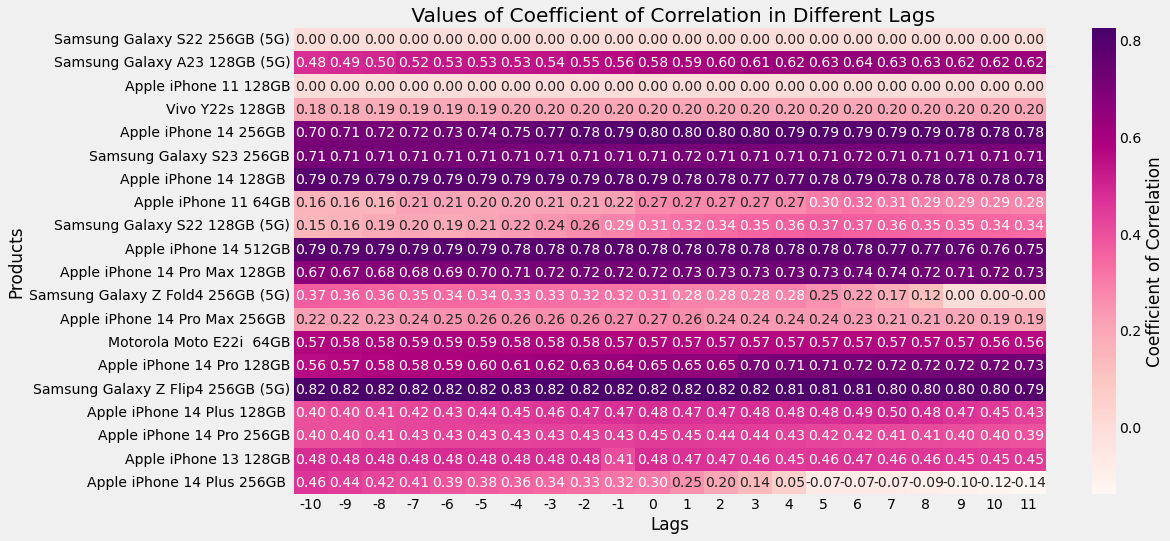

In [23]:
# Define o tamanho da figura
plt.figure(figsize=(15, 8))

# Cria um heatmap para valores positivos
heatmap_pos = sns.heatmap(df_all_product.T, cmap='RdPu', annot=True, fmt=".2f", cbar_kws={'label': 'Coefficient of Correlation'})
plt.title(' Values of Coefficient of Correlation in Different Lags')
plt.xlabel('Lags')
plt.ylabel('Products')

# Ajusta os rótulos dos eixos
plt.yticks(rotation=0)  # Mantém os rótulos do eixo y na posição horizontal
plt.savefig("IMG resultados 2/cc_r1.png", bbox_inches='tight')

plt.show()



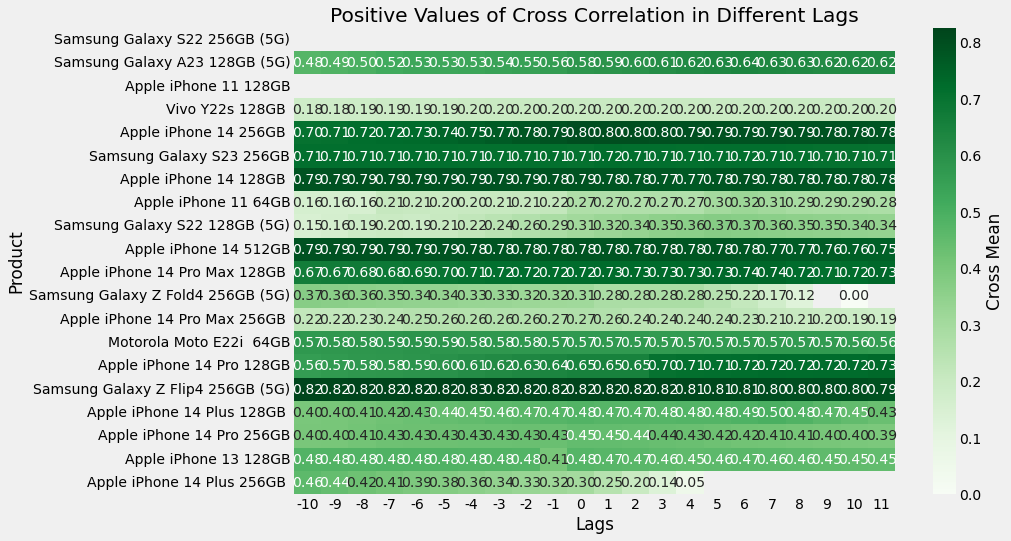

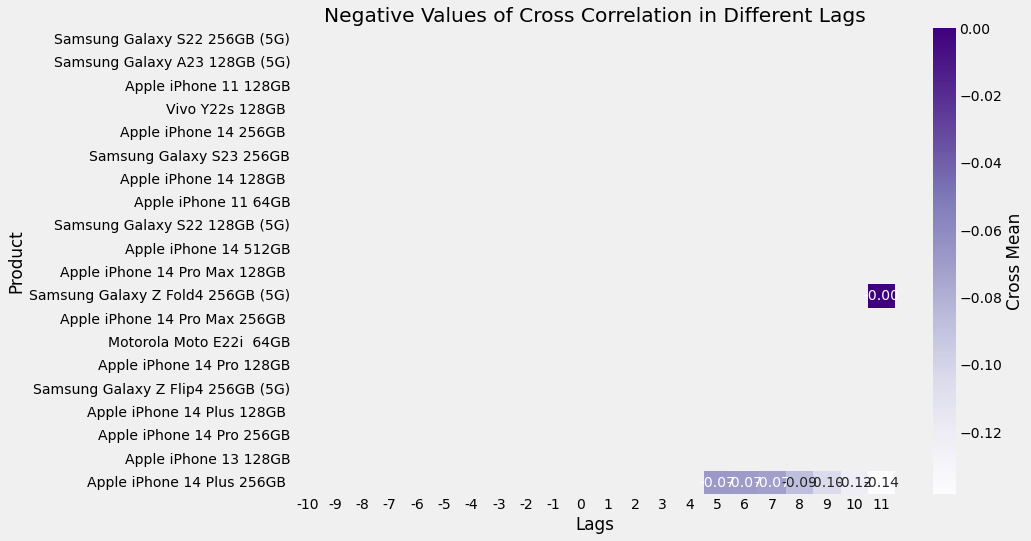

In [24]:
# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Separa os valores positivos e negativos
df_positives = df_all_product.where(df_all_product > 0)
df_negatives = df_all_product.where(df_all_product < 0)

# Cria um heatmap para valores positivos
heatmap_pos = sns.heatmap(df_positives.T, cmap='Greens', annot=True, fmt=".2f", cbar_kws={'label': 'Cross Mean'})
plt.title('Positive Values of Cross Correlation in Different Lags')
plt.xlabel('Lags')
plt.ylabel('Product')

# Ajusta os rótulos dos eixos
plt.yticks(rotation=0)  # Mantém os rótulos do eixo y na posição horizontal
plt.savefig("Exemplos/Exemplo- processed data all products in two companys/heatmap_pos_values_crosscorr_Wom_Falabella.png", bbox_inches='tight')

plt.show()

# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Cria um heatmap para valores negativos
heatmap_neg = sns.heatmap(df_negatives.T, cmap='Purples', annot=True, fmt=".2f", cbar_kws={'label': 'Cross Mean'})
plt.title('Negative Values of Cross Correlation in Different Lags')
plt.xlabel('Lags')
plt.ylabel('Product')

# Ajusta os rótulos dos eixos
plt.yticks(rotation=0)  # Mantém os rótulos do eixo y na posição horizontal
plt.savefig("Exemplos/Exemplo- processed data all products in two companys/heatmap_neg_values_crosscorr_Wom_Falabella.png", bbox_inches='tight')

plt.show()


# Dynamic time warping

In [25]:
def plot_warping_with_dates(s1, s2, path, filename):
    path = dtw.warping_path(s1,s2)
    dtwvis.plot_warping(s1,s2, path, filename=filename)
    return path

def warping_paths(s1_numeric,s2_numeric,filename):

    random.seed(1)
    for idx in range(len(s2_numeric)):
        if random.random() < 0.05:
            s2_numeric[idx] += (random.random() - 0.5) / 2

    d, paths = dtw.warping_paths(s1_numeric, s2_numeric, window=25, psi=2)
    best_path = dtw.best_path(paths)

    dtwvis.plot_warpingpaths(s1_numeric, s2_numeric, paths, best_path,filename=filename)
    plt.show() 

    plt.close()
    return d, best_path
    


In [26]:
def calculate_warping_percent( path, product):
    percentages = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []} # Dicionário para armazenar as porcentagens
    contagens = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []}
    count_neg = count_zero = count_pos = 0
    
    for i, j in path:
        difference = i - j
        if difference < 0:
            count_neg += 1
        elif difference == 0:
            count_zero += 1
        else:
            count_pos += 1

    total = len(path)
    percentages['lag_neg'] = (count_neg / total )*100
    percentages['lag_zero'] = (count_zero / total)*100
    percentages['lag_pos'] = (count_pos / total)*100
    
    percentages['count_lag_neg'] = count_neg 
    percentages['count_lag_zero'] = count_zero 
    percentages['count_lag_pos'] = count_pos 
    percentages['count_total'] = total
    
    

    df_percentages = pd.DataFrame(percentages, index=[product])
    

    return df_percentages

In [27]:
def calculate_warping_percent_best_path(best_path, product):
    
    percentages = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []} # Dicionário para armazenar as porcentagens
    count_neg = count_zero = count_pos = 0
    differences = [point[1] - point[0] for point in best_path]
    
    # Contar os pontos acima, abaixo e na linha de regressão
    for diff in differences:
        if diff > 0:
            count_pos += 1
        elif diff < 0:
            count_neg += 1
        else:
            count_zero += 1


    total = len(best_path)
    percentages['lag_neg'] = (count_neg / total )*100
    percentages['lag_zero'] = (count_zero / total)*100
    percentages['lag_pos'] = (count_pos / total)*100
    
    percentages['count_lag_neg'] = count_neg 
    percentages['count_lag_zero'] = count_zero 
    percentages['count_lag_pos'] = count_pos 
    percentages['count_total'] = total
    
    
    df_percentages = pd.DataFrame(percentages, index=[product])

    return df_percentages, differences


In [28]:
company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'
df_percentages_path = pd.DataFrame()
df_percentages_best_path = pd.DataFrame()
df_result_path = pd.DataFrame()
df_result_best_path = pd.DataFrame()

l = ['lag_neg',  'lag_zero', 'lag_pos', 'count_lag_neg', 'count_lag_zero', 'count_lag_pos', 'count_total']

for product in common_products:
    
    data_serie = create_dataserie(df_company1, df_company2, company1, company2, product)
    
    s1 = data_serie[company1].astype(float).tolist()
    s2 = data_serie[company2].astype(float).tolist()
    
    path = plot_warping_with_dates(s1, s2, path, filename="Exemplos/Exemplo- processed data all products in two companys/warp_Wom_Falabella" + product + ".png")
    
    s1_numeric = data_serie[company1].astype(float).to_numpy()
    s2_numeric = data_serie[company2].astype(float).to_numpy()
    d, best_path = warping_paths(s1_numeric, s2_numeric, "Exemplos/Exemplo- processed data all products in two companys/warping_paths_example_Wom_Falabella" + product + ".png")
    df_percentages_path = calculate_warping_percent(path, product)
    df_percentages_best_path,dif = calculate_warping_percent_best_path(best_path, product)
  
    
    df_result_path = pd.concat([df_result_path, df_percentages_path])
    df_result_best_path = pd.concat([df_result_best_path, df_percentages_best_path])



In [29]:
df_result_path #path

,lag_neg,lag_zero,lag_pos,count_lag_neg,count_lag_zero,count_lag_pos,count_total
Samsung Galaxy S22 256GB (5G),0.000000,100.000000,0.000000,0,41,0,41
Samsung Galaxy A23 128GB (5G),57.177033,7.894737,34.928230,239,33,146,418
Apple iPhone 11 128GB,0.000000,100.000000,0.000000,0,204,0,204
Vivo Y22s 128GB,38.625592,26.066351,35.308057,163,110,149,422
Apple iPhone 14 256GB,15.071770,49.521531,35.406699,63,207,148,418
Samsung Galaxy S23 256GB,40.801887,12.971698,46.226415,173,55,196,424
Apple iPhone 14 128GB,74.358974,25.641026,0.000000,290,100,0,390
Apple iPhone 11 64GB,92.359551,7.640449,0.000000,411,34,0,445
Samsung Galaxy S22 128GB (5G),66.165414,27.067669,6.766917,176,72,18,266
Apple iPhone 14 512GB,35.838150,35.260116,28.901734,124,122,100,346


In [30]:
df_result_best_path #best path

,lag_neg,lag_zero,lag_pos,count_lag_neg,count_lag_zero,count_lag_pos,count_total
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,0,0,46,46
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,162,21,209,392
Apple iPhone 11 128GB,27.586207,0.492611,71.921182,56,1,146,203
Vivo Y22s 128GB,27.594937,0.506329,71.898734,109,2,284,395
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,26,184,179,389
Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120,190,7,218,415
Apple iPhone 14 128GB,1.075269,16.129032,82.795699,4,60,308,372
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,218,6,160,384
Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000,242,0,0,242
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,103,38,194,335


In [31]:
dif_por_produto = {}

for produto in common_products:
    
    
    
    total = len(dif)
    dif_percentages = {'Difference': [], produto: []}  # Corrigindo para usar o nome do produto como coluna

    unique_diffs = set(dif)
    for diff in unique_diffs:
        percent_diff = dif.count(diff) / total * 100
        dif_percentages['Difference'].append(diff)
        dif_percentages[produto].append(percent_diff)

    df_dif_percentages = pd.DataFrame(dif_percentages)
    df_dif_percentages.set_index('Difference', inplace=True)  # Definindo a coluna 'Difference' como índice
    dif_por_produto[produto] = df_dif_percentages

# Concatenar todos os DataFrames em um único DataFrame
result_df = pd.concat(dif_por_produto.values(), axis=1)

result_df

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
Difference,,,,,,,,,,,,,,,,,,,,
0,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596
1,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596,0.438596
2,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509,11.403509
-2,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193
-7,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474,15.789474
-6,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193
-5,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193
-4,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193
-3,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193,0.877193


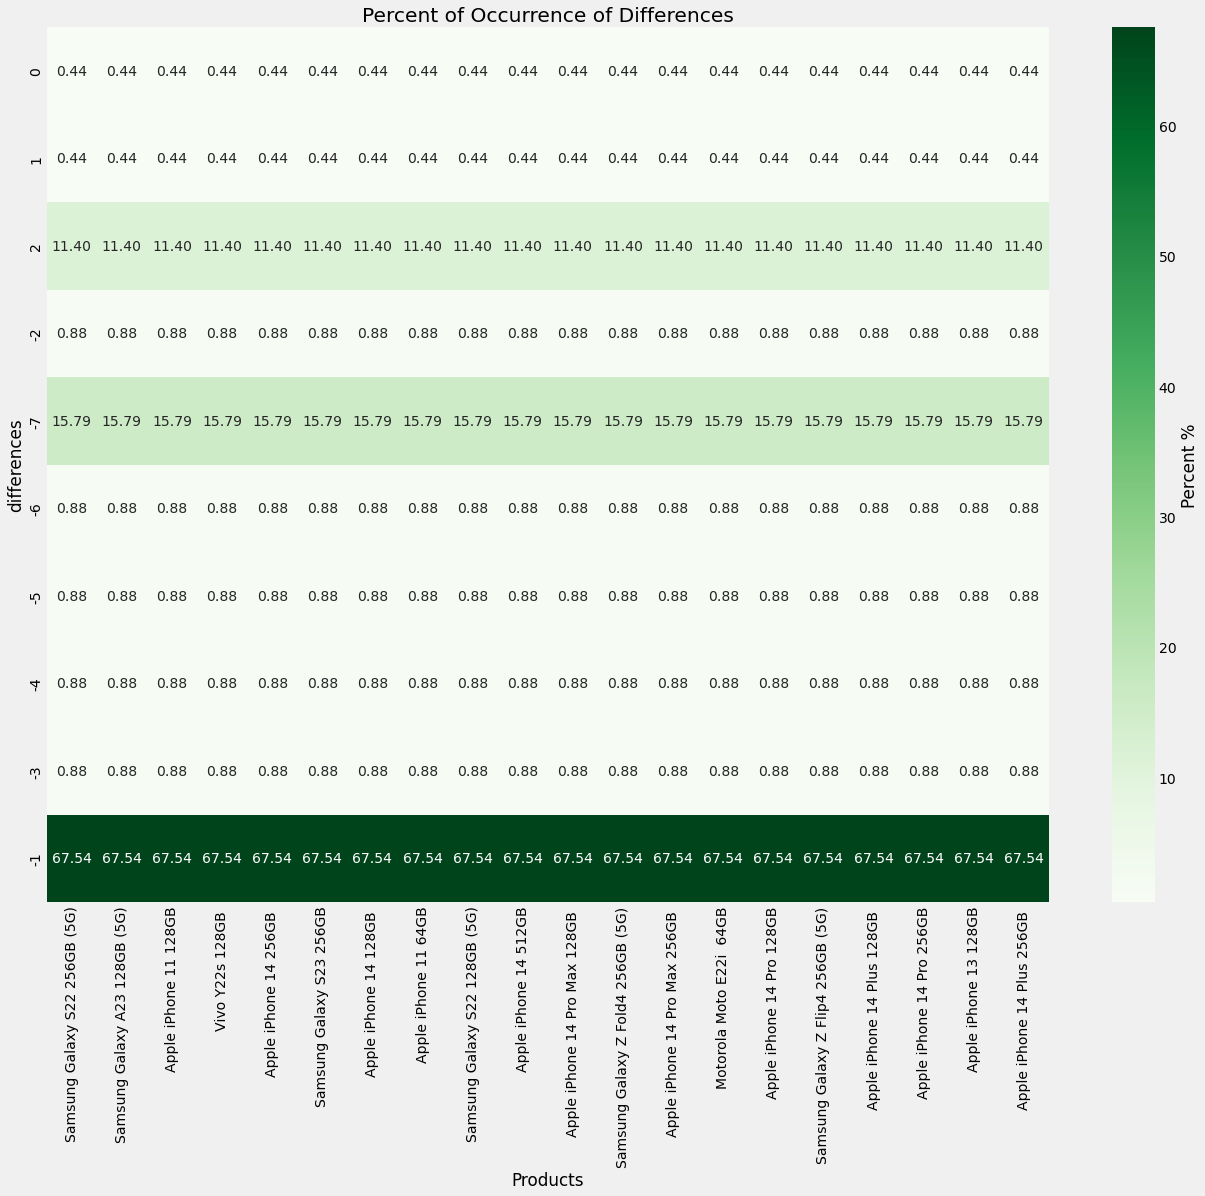

In [32]:
plt.figure(figsize=(20, 15))
sns.heatmap(result_df, cmap="Greens", annot=True, fmt=".2f", cbar_kws={'label': 'Percent %'})
plt.title('Percent of Occurrence of Differences')
plt.xlabel('Products')
plt.ylabel('differences')
plt.savefig("IMG resultados 2/dtw_r2.png", bbox_inches='tight')
plt.show()


In [33]:
df_result_best_path

,lag_neg,lag_zero,lag_pos,count_lag_neg,count_lag_zero,count_lag_pos,count_total
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,0,0,46,46
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,162,21,209,392
Apple iPhone 11 128GB,27.586207,0.492611,71.921182,56,1,146,203
Vivo Y22s 128GB,27.594937,0.506329,71.898734,109,2,284,395
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,26,184,179,389
Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120,190,7,218,415
Apple iPhone 14 128GB,1.075269,16.129032,82.795699,4,60,308,372
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,218,6,160,384
Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000,242,0,0,242
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,103,38,194,335


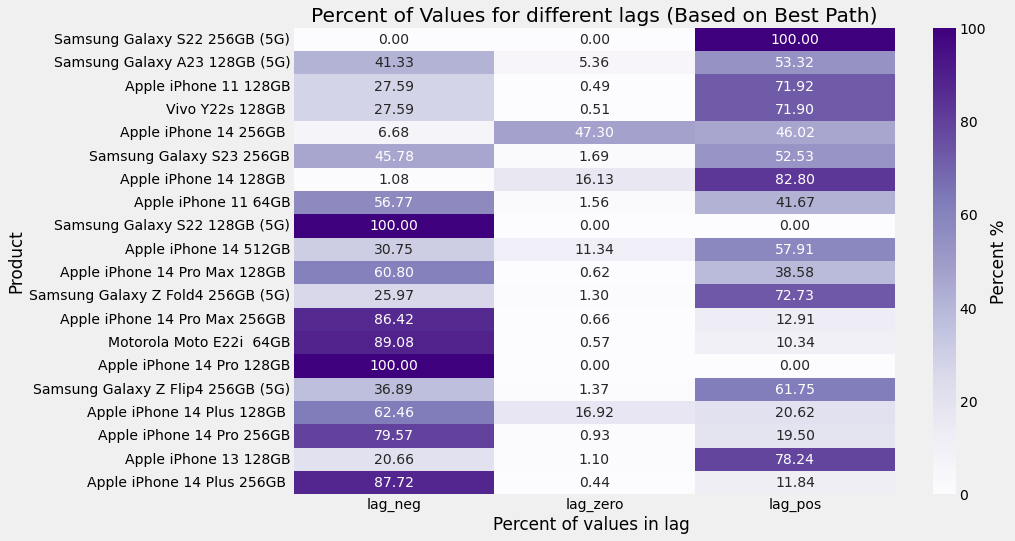

In [34]:

plt.figure(figsize=(12, 8))


df_selected_dtw_best_path = df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]

heatmap_pos = sns.heatmap(df_selected_dtw_best_path, cmap='Purples', annot=True, fmt=".2f", cbar_kws={'label': 'Percent %'})
plt.title('Percent of Values for different lags (Based on Best Path)')
plt.xlabel('Percent of values in lag ')
plt.ylabel('Product')
plt.savefig("IMG resultados 2/dtw_r1.png", bbox_inches='tight')

plt.show()

In [35]:
df_dtw_results_path=df_result_path[['lag_neg', 'lag_zero', 'lag_pos']]
df_dtw_results_best_path=df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]


### Weighted Average

In [36]:
weighted_avg_neg = (df_result_best_path['lag_neg'] * df_result_best_path['count_total']).sum() / df_result_best_path['count_total'].sum()
weighted_avg_zero = (df_result_best_path['lag_zero'] * df_result_best_path['count_total']).sum() / df_result_best_path['count_total'].sum()
weighted_avg_pos = (df_result_best_path['lag_pos'] * df_result_best_path['count_total']).sum() / df_result_best_path['count_total'].sum()


print("Weighted Average for Negative Lags:", weighted_avg_neg)
print("Weighted Average for Zero Lags:", weighted_avg_zero)
print("Weighted Average for Positive Lags:", weighted_avg_pos)

som=weighted_avg_neg+ weighted_avg_zero+weighted_avg_pos
som

Weighted Average for Negative Lags: 49.72589487262174
Weighted Average for Zero Lags: 6.3689132537891
Weighted Average for Positive Lags: 43.90519187358917


100.0

In [37]:
df_cc_values

,lag_neg,lag_zero,lag_pos
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,0.000000
Samsung Galaxy A23 128GB (5G),0.562428,0.584629,0.641159
Apple iPhone 11 128GB,0.000000,0.000000,0.000000
Vivo Y22s 128GB,0.201887,0.202242,0.201761
Apple iPhone 14 256GB,0.788514,0.800862,0.798984
Samsung Galaxy S23 256GB,0.714604,0.707085,0.716286
Apple iPhone 14 128GB,0.792265,0.785824,0.785181
Apple iPhone 11 64GB,0.219027,0.271913,0.321306
Samsung Galaxy S22 128GB (5G),0.285138,0.307704,0.371146
Apple iPhone 14 512GB,0.790189,0.783967,0.784797


## Confusion matrix

In [38]:

max_cc_column = df_cc_values.idxmax(axis=1)
max_dtw_path_column = df_dtw_results_path.idxmax(axis=1)
max_dtw_best_path_column= df_dtw_results_best_path.idxmax(axis=1)


df_max_values = pd.DataFrame({
    'cc': max_cc_column,
    
    'dtw best path': max_dtw_best_path_column
}, index=df_cc_values.index)


df_max_values


,cc,dtw best path
Samsung Galaxy S22 256GB (5G),lag_neg,lag_pos
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos
Apple iPhone 11 128GB,lag_neg,lag_pos
Vivo Y22s 128GB,lag_zero,lag_pos
Apple iPhone 14 256GB,lag_zero,lag_zero
Samsung Galaxy S23 256GB,lag_pos,lag_pos
Apple iPhone 14 128GB,lag_neg,lag_pos
Apple iPhone 11 64GB,lag_pos,lag_neg
Samsung Galaxy S22 128GB (5G),lag_pos,lag_neg
Apple iPhone 14 512GB,lag_neg,lag_pos


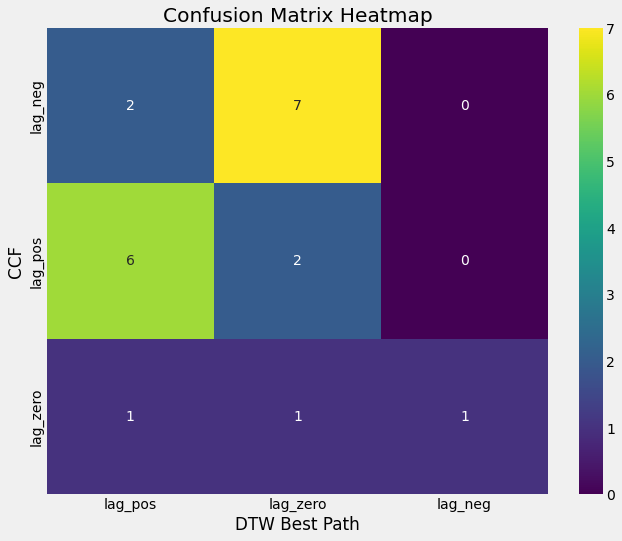

In [39]:

confusion_matrix = metrics.confusion_matrix(df_max_values['cc'], df_max_values['dtw best path'])


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=df_max_values['dtw best path'].unique())


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix, cmap='viridis', annot=True, fmt='d')


plt.title('Confusion Matrix Heatmap')


plt.xlabel('DTW Best Path')
plt.ylabel('CCF')

heatmap.set_xticklabels(df_max_values['dtw best path'].unique())
heatmap.set_yticklabels(df_max_values['cc'].unique())

plt.savefig("IMG resultados 2/confusion_matrix_1.png", bbox_inches='tight')


plt.show()


In [40]:
df_selected = df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]
df_selected

,lag_neg,lag_zero,lag_pos
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327
Apple iPhone 11 128GB,27.586207,0.492611,71.921182
Vivo Y22s 128GB,27.594937,0.506329,71.898734
Apple iPhone 14 256GB,6.683805,47.300771,46.015424
Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120
Apple iPhone 14 128GB,1.075269,16.129032,82.795699
Apple iPhone 11 64GB,56.770833,1.562500,41.666667
Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000
Apple iPhone 14 512GB,30.746269,11.343284,57.910448


# Clustering Analyse 

In [41]:

df_selected.reset_index(inplace=True)


print(df_selected)

                                index     lag_neg   lag_zero     lag_pos
0       Samsung Galaxy S22 256GB (5G)    0.000000   0.000000  100.000000
1       Samsung Galaxy A23 128GB (5G)   41.326531   5.357143   53.316327
2               Apple iPhone 11 128GB   27.586207   0.492611   71.921182
3                    Vivo Y22s 128GB    27.594937   0.506329   71.898734
4              Apple iPhone 14 256GB     6.683805  47.300771   46.015424
5            Samsung Galaxy S23 256GB   45.783133   1.686747   52.530120
6              Apple iPhone 14 128GB     1.075269  16.129032   82.795699
7                Apple iPhone 11 64GB   56.770833   1.562500   41.666667
8       Samsung Galaxy S22 128GB (5G)  100.000000   0.000000    0.000000
9               Apple iPhone 14 512GB   30.746269  11.343284   57.910448
10     Apple iPhone 14 Pro Max 128GB    60.802469   0.617284   38.580247
11  Samsung Galaxy Z Fold4 256GB (5G)   25.974026   1.298701   72.727273
12     Apple iPhone 14 Pro Max 256GB    86.423841  

In [42]:

df_selected.rename(columns={'index': 'product'}, inplace=True)


print(df_selected)


                              product     lag_neg   lag_zero     lag_pos
0       Samsung Galaxy S22 256GB (5G)    0.000000   0.000000  100.000000
1       Samsung Galaxy A23 128GB (5G)   41.326531   5.357143   53.316327
2               Apple iPhone 11 128GB   27.586207   0.492611   71.921182
3                    Vivo Y22s 128GB    27.594937   0.506329   71.898734
4              Apple iPhone 14 256GB     6.683805  47.300771   46.015424
5            Samsung Galaxy S23 256GB   45.783133   1.686747   52.530120
6              Apple iPhone 14 128GB     1.075269  16.129032   82.795699
7                Apple iPhone 11 64GB   56.770833   1.562500   41.666667
8       Samsung Galaxy S22 128GB (5G)  100.000000   0.000000    0.000000
9               Apple iPhone 14 512GB   30.746269  11.343284   57.910448
10     Apple iPhone 14 Pro Max 128GB    60.802469   0.617284   38.580247
11  Samsung Galaxy Z Fold4 256GB (5G)   25.974026   1.298701   72.727273
12     Apple iPhone 14 Pro Max 256GB    86.423841  

/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4432/2084884785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'index': 'product'}, inplace=True)


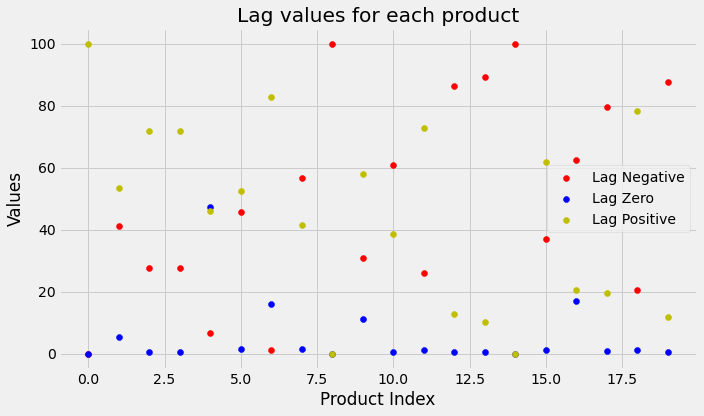

In [43]:

lag_neg = df_selected['lag_neg']
lag_zero = df_selected['lag_zero']
lag_pos = df_selected['lag_pos']


fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_selected.index, lag_neg, label='Lag Negative', color='r')
ax.scatter(df_selected.index, lag_zero, label='Lag Zero', color='b')
ax.scatter(df_selected.index, lag_pos, label='Lag Positive', color='y')


ax.set_xlabel('Product Index')
ax.set_ylabel('Values')
ax.set_title('Lag values for each product')
ax.legend()


plt.tight_layout()
plt.show()


/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4432/1741724038.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.labels_


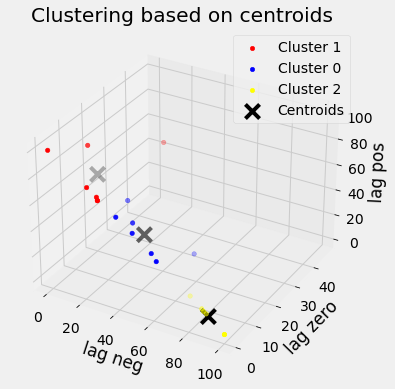

Coordinates of the centroids: [47.82514552 15.65362858 90.46502709] [5.55087922 9.5470533  0.43405889] [46.62397526 74.79931812  9.10091402]


In [44]:
import matplotlib.pyplot as plt
import sklearn.cluster
import pandas as pd


kmeans = sklearn.cluster.KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df_selected[['lag_neg', 'lag_zero', 'lag_pos']])


df_selected['cluster'] = kmeans.labels_


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


colors = {0: 'blue', 1: 'red', 2: 'yellow'}


for cluster in df_selected['cluster'].unique():
    ax.scatter(df_selected[df_selected['cluster'] == cluster]['lag_neg'],
               df_selected[df_selected['cluster'] == cluster]['lag_zero'],
               df_selected[df_selected['cluster'] == cluster]['lag_pos'],
               label=f'Cluster {cluster}',
               color=colors[cluster])


ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='x', color='black', s=200, label='Centroids')

ax.set_xlabel('lag neg')
ax.set_ylabel('lag zero')
ax.set_zlabel('lag pos')

plt.title('Clustering based on centroids')
plt.legend()

plt.savefig("IMG resultados 2/dtw_clus_1.png", bbox_inches='tight')
plt.show()

print("Coordinates of the centroids:", kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2])


In [45]:
df_selected

,product,lag_neg,lag_zero,lag_pos,cluster
0,Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,1
1,Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,0
2,Apple iPhone 11 128GB,27.586207,0.492611,71.921182,1
3,Vivo Y22s 128GB,27.594937,0.506329,71.898734,1
4,Apple iPhone 14 256GB,6.683805,47.300771,46.015424,1
5,Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120,0
6,Apple iPhone 14 128GB,1.075269,16.129032,82.795699,1
7,Apple iPhone 11 64GB,56.770833,1.562500,41.666667,0
8,Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000,2
9,Apple iPhone 14 512GB,30.746269,11.343284,57.910448,0


In [46]:

df_selected['max_value_column'] = df_selected[['lag_neg', 'lag_zero', 'lag_pos']].idxmax(axis=1)

df_selected['cluster'] = kmeans.labels_


print("Representation with product name, lag type, column name with maximum value and cluster:")
df_selected[['product', 'max_value_column', 'cluster']]


Representation with product name, lag type, column name with maximum value and cluster:


/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4432/4231824307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['max_value_column'] = df_selected[['lag_neg', 'lag_zero', 'lag_pos']].idxmax(axis=1)
/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4432/4231824307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.labels_


,product,max_value_column,cluster
0,Samsung Galaxy S22 256GB (5G),lag_pos,1
1,Samsung Galaxy A23 128GB (5G),lag_pos,0
2,Apple iPhone 11 128GB,lag_pos,1
3,Vivo Y22s 128GB,lag_pos,1
4,Apple iPhone 14 256GB,lag_zero,1
5,Samsung Galaxy S23 256GB,lag_pos,0
6,Apple iPhone 14 128GB,lag_pos,1
7,Apple iPhone 11 64GB,lag_neg,0
8,Samsung Galaxy S22 128GB (5G),lag_neg,2
9,Apple iPhone 14 512GB,lag_pos,0


In [47]:
df_selected

,product,lag_neg,lag_zero,lag_pos,cluster,max_value_column
0,Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,1,lag_pos
1,Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,0,lag_pos
2,Apple iPhone 11 128GB,27.586207,0.492611,71.921182,1,lag_pos
3,Vivo Y22s 128GB,27.594937,0.506329,71.898734,1,lag_pos
4,Apple iPhone 14 256GB,6.683805,47.300771,46.015424,1,lag_zero
5,Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120,0,lag_pos
6,Apple iPhone 14 128GB,1.075269,16.129032,82.795699,1,lag_pos
7,Apple iPhone 11 64GB,56.770833,1.562500,41.666667,0,lag_neg
8,Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000,2,lag_neg
9,Apple iPhone 14 512GB,30.746269,11.343284,57.910448,0,lag_pos


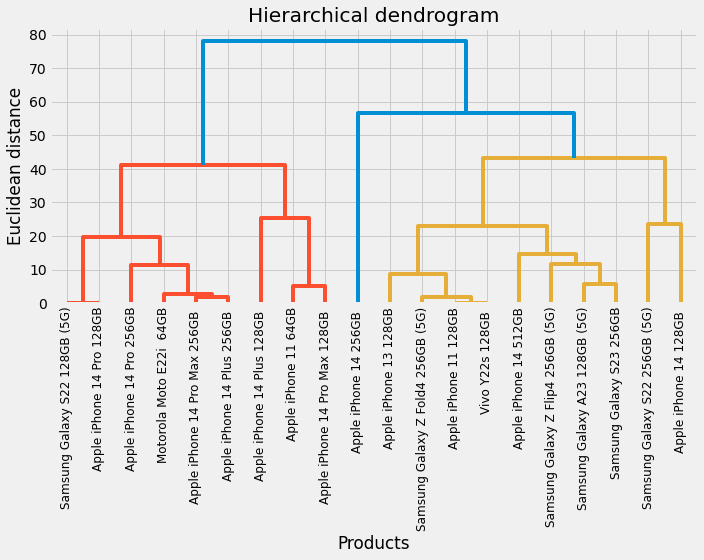

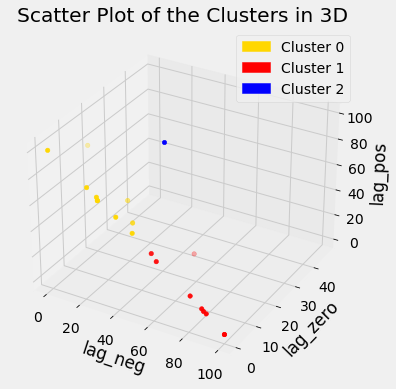

In [48]:

lag_data = df_selected[['lag_neg', 'lag_zero', 'lag_pos']]


scaler = StandardScaler()
lag_data_scaled = list(zip(df_selected['lag_neg'], df_selected['lag_zero'], df_selected['lag_pos']))


Z = linkage(lag_data_scaled, method='average', metric='euclidean')

plt.figure(figsize=(10, 8))
dendrogram(Z, labels=df_selected['product'].values)
plt.title('Hierarchical dendrogram')
plt.xlabel('Products')
plt.ylabel('Euclidean distance')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig("IMG resultados 2/dtw_clus_2.png", bbox_inches='tight')
plt.show()


import matplotlib.patches as mpatches


cores_cluster = {0: '#FFD700',  # yellow
                 1: '#FF0000',  # red
                 2: '#0000FF'}  # blue


hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(lag_data_scaled)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


for label in range(3):
    cluster_indices = labels == label
    ax.scatter(df_selected.loc[cluster_indices, 'lag_neg'], df_selected.loc[cluster_indices, 'lag_zero'], df_selected.loc[cluster_indices, 'lag_pos'], c=cores_cluster[label], label=f'Cluster {label}')


ax.set_xlabel('lag_neg')
ax.set_ylabel('lag_zero')
ax.set_zlabel('lag_pos')


legend_handles = [mpatches.Patch(color=cores_cluster[label], label=f'Cluster {label}') for label in range(3)]


plt.legend(handles=legend_handles, loc='upper right')


plt.title('Scatter Plot of the Clusters in 3D')
plt.savefig("IMG resultados 2/dtw_clus_2_1.png", bbox_inches='tight')
plt.show()



In [49]:
import pandas as pd

# Adicione as labels ao DataFrame
df_selected['cluster_label'] = labels

# Agrupe os dados pelo rótulo do cluster
grouped_data = df_selected.groupby('cluster_label')

# Calcule a média e o desvio padrão para cada cluster
cluster_statistics = grouped_data.agg({'lag_neg': ['mean', 'std'],
                                       'lag_zero': ['mean', 'std'],
                                       'lag_pos': ['mean', 'std']})

print(cluster_statistics)


                 lag_neg              lag_zero              lag_pos           
                    mean        std       mean       std       mean        std
cluster_label                                                                 
0              25.763277  15.266289   3.928190  5.490591  70.308533  14.693698
1              80.313889  16.576890   2.411913  5.462154  17.274198  14.825697
2               6.683805        NaN  47.300771       NaN  46.015424        NaN


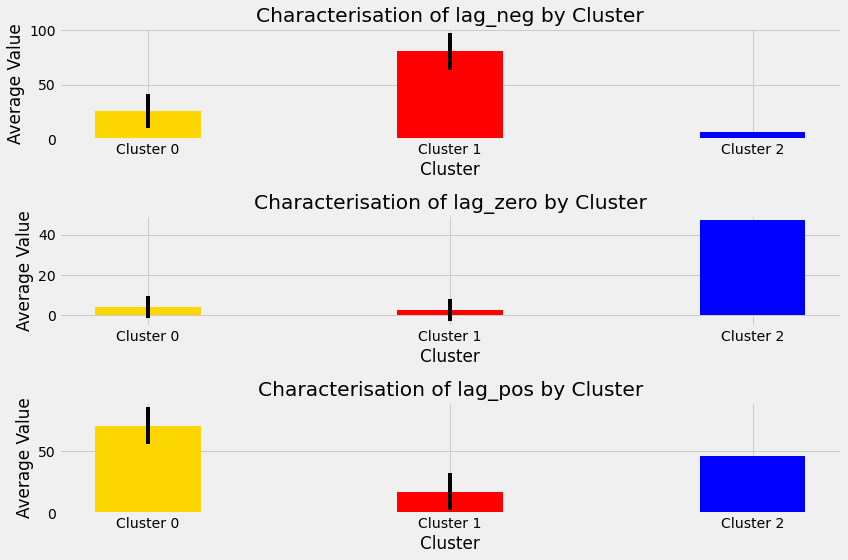

In [50]:
import matplotlib.pyplot as plt
import numpy as np

n_clusters = len(cluster_statistics)
n_lags = len(cluster_statistics.columns.levels[0])
bar_width = 0.35
index = np.arange(n_clusters)

fig, axes = plt.subplots(n_lags, 1, figsize=(12, 8))

lag_types = cluster_statistics.columns.levels[0]

cores_cluster = {0: '#FFD700',  # yellow
                 1: '#FF0000',  # red
                 2: '#0000FF'}  # blue

for i, lag_type in enumerate(lag_types):
    means = cluster_statistics[lag_type]['mean']
    stds = cluster_statistics[lag_type]['std']
    ax = axes[i]
    for cluster, cor in cores_cluster.items():
        ax.bar(cluster, means[cluster], bar_width, yerr=stds[cluster], label=f'Cluster {cluster}', color=cor)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Average Value')
    ax.set_title(f'Characterisation of {lag_type} by Cluster')
    ax.set_xticks(list(cores_cluster.keys()))
    ax.set_xticklabels([f'Cluster {i}' for i in list(cores_cluster.keys())])

plt.tight_layout()
plt.savefig("IMG resultados 2/dtw_clus_3.png", bbox_inches='tight')
plt.show()


In [51]:
print(df_selected['cluster'].value_counts()) 

cluster
1    7
0    7
2    6
Name: count, dtype: int64


# Intantaneous phase synchrony

In [52]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


In [53]:
def inst_phase_synchrony(s1,s2,filename):
    lowcut  = .01
    highcut = .5
    fs = 30.
    order = 1
    d1 = s1
    d2 = s2

    min_length = min(len(d1), len(d2))
    d1 = d1[:min_length]
    d2 = d2[:min_length]

    y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
    y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

    al1 = np.angle(hilbert(y1),deg=False)
    al2 = np.angle(hilbert(y2),deg=False)
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    N = len(al1)
    
    # Plot results
    f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
    ax[0].plot(y1,color='r',label='y1')
    ax[0].plot(y2,color='b',label='y2')
    ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
    ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
    ax[1].plot(al1,color='r')
    ax[1].plot(al2,color='b')
    ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    ax[2].plot(phase_synchrony)
    ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')

    plt.close()

    return al1, al2

In [54]:
company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'
df_phase_differences=pd.DataFrame()
for product in common_products:
#product='Apple iPhone 14 Plus 128GB'
    data_serie=create_dataserie(df_company1, df_company2, company1, company2, product)
    s1 = data_serie[company1].astype(float)
    s2 = data_serie[company2].astype(float)
    s1_centred=s1-s1.mean()
    s2_centred=s2-s2.mean()
    al1,al2= inst_phase_synchrony(s1_centred,s2_centred,"Exemplos/Exemplo- processed data all products in two companys/plot_IPS_Wom_Falabella"+product+".png")
    
    
    #al1,al2= inst_phase_synchrony(s1,s2,"Exemplos/Exemplo- processed data all products in two companys/plot_IPS_Wom_Falabella"+product+".png")
    phase_differences = al1 - al2
    serie_phase_differences = pd.Series(phase_differences, name=product)
    
    
    df_phase_differences = pd.concat([df_phase_differences, serie_phase_differences], axis=1)


df_phase_differences

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
0,0.011761,0.096340,3.486797,0.142966,-0.027678,-0.062338,-0.062680,0.982324,-0.145342,0.178348,0.063567,-0.263246,0.301206,0.036430,-0.235471,-0.103903,1.471157,0.010410,0.089341,1.271158
1,0.133149,0.127758,3.614052,0.228531,-0.049694,-0.053827,-0.115054,1.035767,-0.269776,0.289041,0.131286,-0.318768,0.626642,0.070924,-0.239169,-0.152085,1.650332,0.026520,0.128926,1.436188
2,0.164273,0.126006,3.570018,0.204774,-0.054975,-0.020463,-0.115002,1.014865,-0.270713,0.282343,0.131023,-0.290831,0.657301,0.070122,-0.217166,-0.138133,1.752263,0.033012,0.128194,1.567711
3,0.272517,0.128455,3.563958,0.235106,-0.068978,0.004607,-0.143911,0.973857,-0.330215,0.336459,0.175262,-0.273828,0.841249,0.091455,-0.190660,-0.151983,1.716402,0.049075,0.149159,1.498921
4,0.315290,0.127320,3.490239,0.209439,-0.077037,0.035439,-0.143748,0.963874,-0.333372,0.327440,0.173583,-0.254270,0.870733,0.089642,-0.174867,-0.134380,1.793031,0.057041,0.149945,1.588663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,NaN,-0.003878,NaN,0.045389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,-0.002215,NaN,0.041783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN,NaN,0.031786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,NaN,NaN,NaN,0.029001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_phase_differences['Apple iPhone 14 Plus 128GB ']

0      1.471157
1      1.650332
2      1.752263
3      1.716402
4      1.793031
         ...   
329         NaN
330         NaN
331         NaN
332         NaN
333         NaN
Name: Apple iPhone 14 Plus 128GB , Length: 334, dtype: float64

In [56]:
def calcular_percentage_lag(phase_differences):
    total_points = len(phase_differences)
    lag_positivo = 0
    lag_negativo = 0
    lag_zero = 0
    
    for difference in phase_differences:
        if difference > 0:
            lag_positivo += 1
        elif difference < 0:
            lag_negativo += 1
        else:
            lag_zero += 1
    
    percentage_lag_positivo = (lag_positivo / total_points) * 100
    percentage_lag_negativo = (lag_negativo / total_points) * 100
    percentage_lag_zero = (lag_zero / total_points) * 100
    total=percentage_lag_positivo+percentage_lag_negativo+ percentage_lag_zero
    
    return percentage_lag_positivo, percentage_lag_zero, percentage_lag_negativo, total


In [57]:

df_percents_IPS = pd.DataFrame(columns=['lag_neg','lag_zero', 'lag_pos'], index=common_products)


for product in common_products:
    df = df_phase_differences[product].dropna()
    
    percentage_lag_positivo, percentage_lag_zero, percentage_lag_negativo, total = calcular_percentage_lag(df)
    
    
    df_percents_IPS.loc[product] = [percentage_lag_negativo, percentage_lag_zero, percentage_lag_positivo]


print(df_percents_IPS)



                                     lag_neg lag_zero    lag_pos
Samsung Galaxy S22 256GB (5G)      34.146341      0.0  65.853659
Samsung Galaxy A23 128GB (5G)      36.120401      0.0  63.879599
Apple iPhone 11 128GB              46.078431      0.0  53.921569
Vivo Y22s 128GB                    52.905199      0.0  47.094801
Apple iPhone 14 256GB              91.540785      0.0   8.459215
Samsung Galaxy S23 256GB           60.983607      0.0  39.016393
Apple iPhone 14 128GB              58.682635      0.0  41.317365
Apple iPhone 11 64GB               46.905537      0.0  53.094463
Samsung Galaxy S22 128GB (5G)      81.081081      0.0  18.918919
Apple iPhone 14 512GB              14.532872      0.0  85.467128
Apple iPhone 14 Pro Max 128GB      85.714286      0.0  14.285714
Samsung Galaxy Z Fold4 256GB (5G)  35.384615      0.0  64.615385
Apple iPhone 14 Pro Max 256GB      67.537313      0.0  32.462687
Motorola Moto E22i  64GB           63.728814      0.0  36.271186
Apple iPhone 14 Pro 128GB

In [58]:
df_percents_IPS

,lag_neg,lag_zero,lag_pos
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599
Apple iPhone 11 128GB,46.078431,0.0,53.921569
Vivo Y22s 128GB,52.905199,0.0,47.094801
Apple iPhone 14 256GB,91.540785,0.0,8.459215
Samsung Galaxy S23 256GB,60.983607,0.0,39.016393
Apple iPhone 14 128GB,58.682635,0.0,41.317365
Apple iPhone 11 64GB,46.905537,0.0,53.094463
Samsung Galaxy S22 128GB (5G),81.081081,0.0,18.918919
Apple iPhone 14 512GB,14.532872,0.0,85.467128


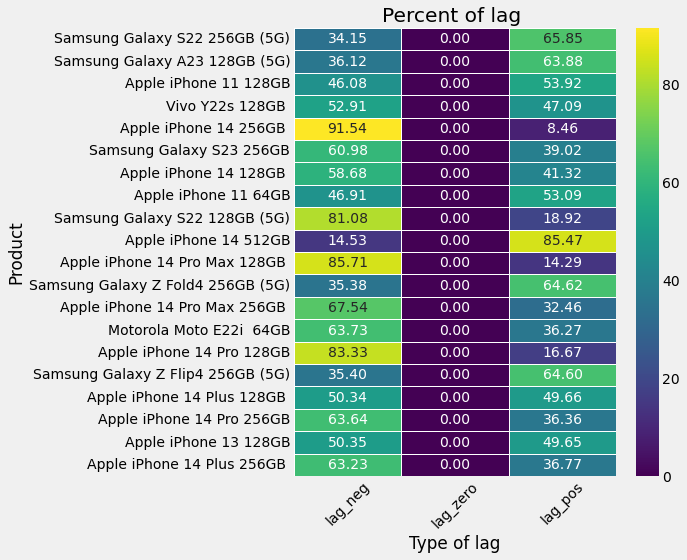

In [59]:

df_percents_IPS['lag_neg'] = pd.to_numeric(df_percents_IPS['lag_neg'])
df_percents_IPS['lag_zero'] = pd.to_numeric(df_percents_IPS['lag_zero'])
df_percents_IPS['lag_pos'] = pd.to_numeric(df_percents_IPS['lag_pos'])


plt.figure(figsize=(10, 8))
sns.heatmap(df_percents_IPS, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Percent of lag ')
plt.xlabel('Type of lag')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("IMG resultados 2/ips_r1.png", bbox_inches='tight')

plt.show()


In [60]:


max_cc_column = df_cc_values.idxmax(axis=1)
max_dtw_path_column = df_dtw_results_path.idxmax(axis=1)
max_dtw_best_path_column= df_dtw_results_best_path.idxmax(axis=1)
max_ips_column=df_percents_IPS.idxmax(axis=1)


df_max_values2 = pd.DataFrame({
    
    
    'dtw best path': max_dtw_best_path_column,
    
    'IPS':max_ips_column
}, index=df_percents_IPS.index)


df_max_values2

,dtw best path,IPS
Samsung Galaxy S22 256GB (5G),lag_pos,lag_pos
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos
Apple iPhone 11 128GB,lag_pos,lag_pos
Vivo Y22s 128GB,lag_pos,lag_neg
Apple iPhone 14 256GB,lag_zero,lag_neg
Samsung Galaxy S23 256GB,lag_pos,lag_neg
Apple iPhone 14 128GB,lag_pos,lag_neg
Apple iPhone 11 64GB,lag_neg,lag_pos
Samsung Galaxy S22 128GB (5G),lag_neg,lag_neg
Apple iPhone 14 512GB,lag_pos,lag_pos


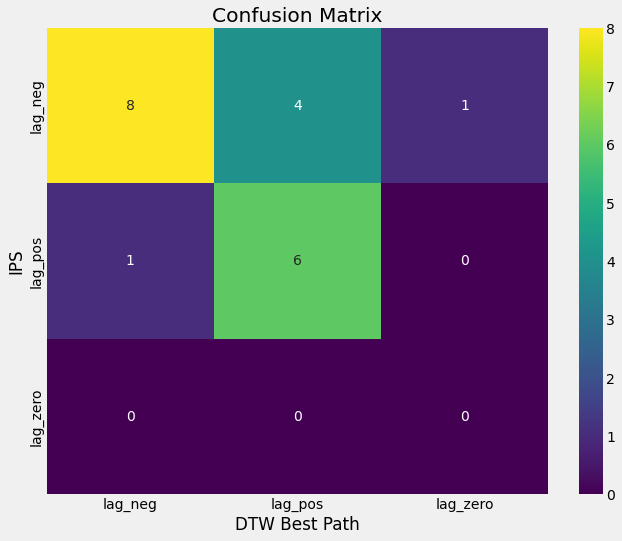

In [61]:

confusion_matrix = metrics.confusion_matrix(df_max_values2['IPS'], df_max_values2['dtw best path'])


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=df_max_values2['dtw best path'].unique())


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix, cmap='viridis', annot=True, fmt='d')


plt.title('Confusion Matrix')


plt.xlabel('DTW Best Path')
plt.ylabel('IPS')


heatmap.set_xticklabels(['lag_neg', 'lag_pos','lag_zero'])

heatmap.set_yticklabels(['lag_neg', 'lag_pos','lag_zero'])

plt.savefig("IMG resultados 2/confusion_matrix_2.png", bbox_inches='tight')


plt.show()


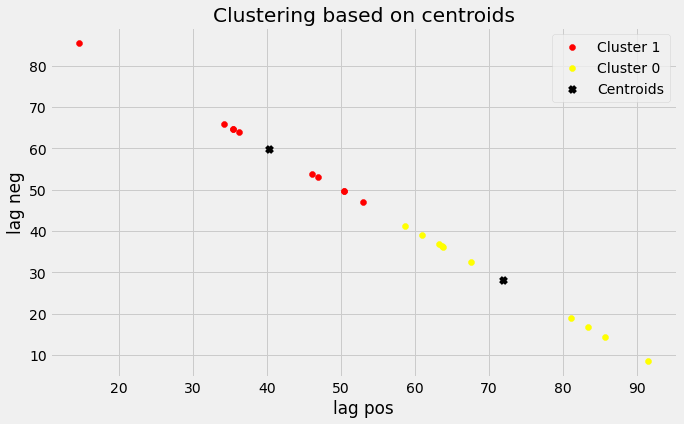

Coordinates of the centroids: [71.94669171 40.21576503] [28.05330829 59.78423497]


In [62]:

kmeans = sklearn.cluster.KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df_percents_IPS[['lag_neg', 'lag_pos']])

df_percents_IPS['cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))


cores_cluster = {0: 'yellow', 1: 'red'} 

for cluster in df_percents_IPS['cluster'].unique():
    plt.scatter(df_percents_IPS[df_percents_IPS['cluster'] == cluster]['lag_neg'], 
                df_percents_IPS[df_percents_IPS['cluster'] == cluster]['lag_pos'],
                label=f'Cluster {cluster}', color=cores_cluster[cluster])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', color='black', label='Centroids')

plt.xlabel('lag pos')
plt.ylabel('lag neg')

plt.title('Clustering based on centroids')
plt.legend()
plt.savefig("IMG resultados 2/ips_clus_1.png", bbox_inches='tight')
plt.show()

print("Coordinates of the centroids:", kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])


In [63]:
df_percents_IPS

,lag_neg,lag_zero,lag_pos,cluster
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1
Apple iPhone 11 128GB,46.078431,0.0,53.921569,1
Vivo Y22s 128GB,52.905199,0.0,47.094801,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0
Samsung Galaxy S23 256GB,60.983607,0.0,39.016393,0
Apple iPhone 14 128GB,58.682635,0.0,41.317365,0
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1
Samsung Galaxy S22 128GB (5G),81.081081,0.0,18.918919,0
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1


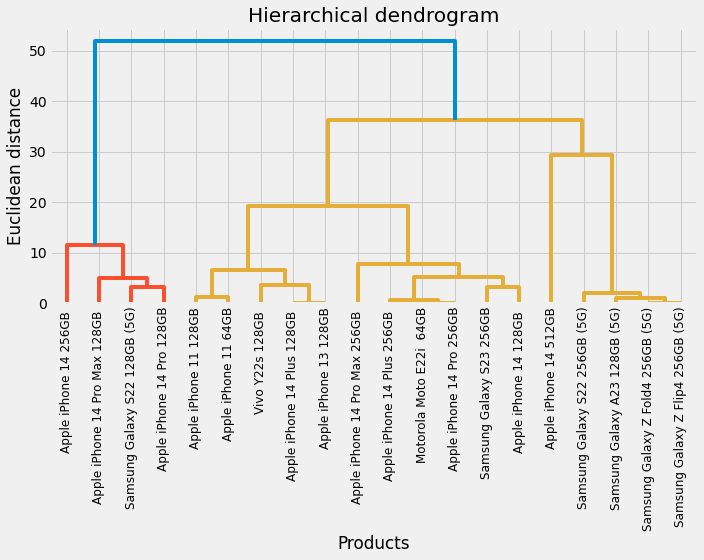

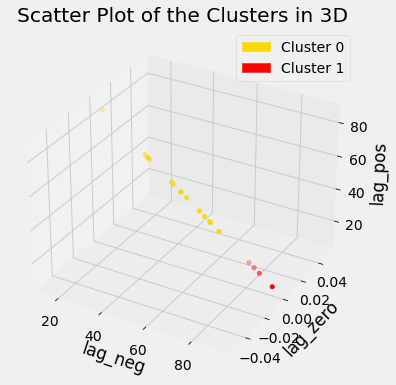

In [64]:

lag_data = df_percents_IPS[['lag_neg',  'lag_pos']]


scaler = StandardScaler()
lag_data_scaled = list(zip(df_percents_IPS['lag_neg'], df_percents_IPS['lag_pos']))


Z = linkage(lag_data_scaled, method='average', metric='euclidean')


plt.figure(figsize=(10, 8))
dendrogram(Z, labels=df_selected['product'].values)
plt.title('Hierarchical dendrogram')
plt.xlabel('Products')
plt.ylabel('Euclidean distance')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig("IMG resultados 2/ips_clus_2.png", bbox_inches='tight')
plt.show()


import matplotlib.patches as mpatches


cores_cluster = {0: '#FFD700',  
                 1: '#FF0000'}  


hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(lag_data_scaled)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


for label in range(2):
    cluster_indices = labels == label
    ax.scatter(df_percents_IPS.loc[cluster_indices, 'lag_neg'], 
               df_percents_IPS.loc[cluster_indices, 'lag_zero'], 
               df_percents_IPS.loc[cluster_indices, 'lag_pos'], 
               c=cores_cluster[label], label=f'Cluster {label}')


ax.set_xlabel('lag_neg')
ax.set_ylabel('lag_zero')
ax.set_zlabel('lag_pos')


legend_handles = [mpatches.Patch(color=cores_cluster[label], label=f'Cluster {label}') for label in range(2)]


plt.legend(handles=legend_handles, loc='upper right')


plt.title('Scatter Plot of the Clusters in 3D')
plt.savefig("IMG resultados 2/ips_clus_2_1.png", bbox_inches='tight')
plt.show()


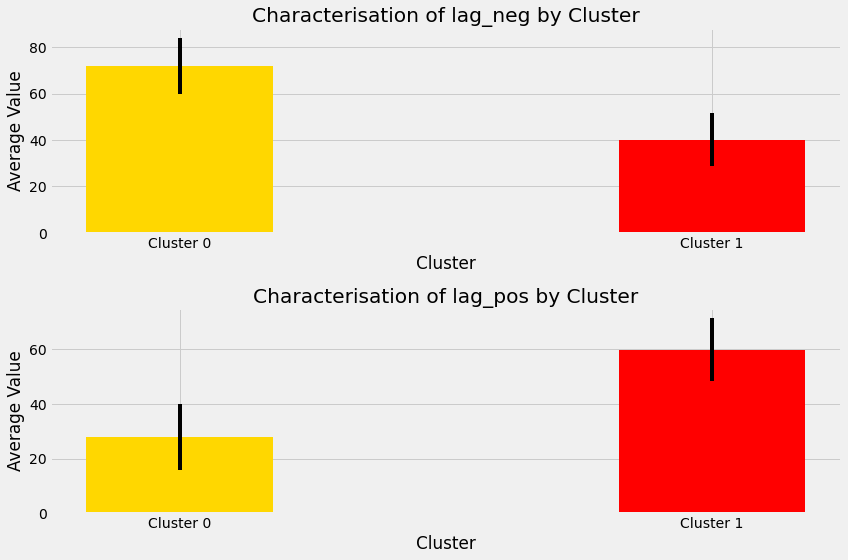

In [65]:

cluster_stats = df_percents_IPS.groupby('cluster')[['lag_neg', 'lag_pos']].agg(['mean', 'std'])


n_clusters = len(cluster_stats)
n_lags = len(cluster_stats.columns.levels[0])
bar_width = 0.35
index = np.arange(n_clusters)

fig, axes = plt.subplots(nrows=n_lags, ncols=1, figsize=(12, 8))

lag_types = cluster_stats.columns.levels[0]


cores_cluster = {0: '#FFD700',  # Amarelo
                 1: '#FF0000'}  # Vermelho

for i, lag_type in enumerate(lag_types):
    means = cluster_stats[lag_type]['mean']
    stds = cluster_stats[lag_type]['std']
    ax = axes[i]
    for cluster, cor in cores_cluster.items():
        ax.bar(cluster, means[cluster], bar_width, yerr=stds[cluster], label=f'Cluster {cluster}', color=cor)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Average Value')
    ax.set_title(f'Characterisation of {lag_type} by Cluster')
    ax.set_xticks(list(cores_cluster.keys()))
    ax.set_xticklabels([f'Cluster {i}' for i in list(cores_cluster.keys())])

plt.tight_layout()
plt.savefig("IMG resultados 2/ips_clus_3.png", bbox_inches='tight')
plt.show()


# correspondencia entre DTW e IPS

In [66]:
df_percents_IPS

,lag_neg,lag_zero,lag_pos,cluster
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1
Apple iPhone 11 128GB,46.078431,0.0,53.921569,1
Vivo Y22s 128GB,52.905199,0.0,47.094801,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0
Samsung Galaxy S23 256GB,60.983607,0.0,39.016393,0
Apple iPhone 14 128GB,58.682635,0.0,41.317365,0
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1
Samsung Galaxy S22 128GB (5G),81.081081,0.0,18.918919,0
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1


In [67]:
df_selected_dtw = df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]


In [68]:
# Calculating the correlation between the IPS and DTW time series
correlation = df_percents_IPS.corrwith(df_selected_dtw, axis=0)

print(correlation)


lag_neg     0.454235
lag_zero         NaN
lag_pos     0.585177
cluster          NaN
dtype: float64


# chi-square DTW

In [69]:
df_max_values2

,dtw best path,IPS
Samsung Galaxy S22 256GB (5G),lag_pos,lag_pos
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos
Apple iPhone 11 128GB,lag_pos,lag_pos
Vivo Y22s 128GB,lag_pos,lag_neg
Apple iPhone 14 256GB,lag_zero,lag_neg
Samsung Galaxy S23 256GB,lag_pos,lag_neg
Apple iPhone 14 128GB,lag_pos,lag_neg
Apple iPhone 11 64GB,lag_neg,lag_pos
Samsung Galaxy S22 128GB (5G),lag_neg,lag_neg
Apple iPhone 14 512GB,lag_pos,lag_pos


In [70]:
df_dtw_max_values_counts_1=df_max_values2['dtw best path'].value_counts()
df_dtw_max_values_counts_1

dtw best path
lag_pos     10
lag_neg      9
lag_zero     1
Name: count, dtype: int64

In [71]:
df_dtw_max_values_counts_1=df_dtw_max_values_counts_1.rename_axis('dtw best path')\
                                             .reset_index(name='n')\
                                             .sort_values('dtw best path')

In [72]:
df_dtw_max_values_counts_1

,dtw best path,n
1,lag_neg,9
0,lag_pos,10
2,lag_zero,1


In [73]:
hypothesized_dtw_1=pd.DataFrame({
    'dtw best path':['lag_neg','lag_pos','lag_zero'],
    'prop':[1/3,1/3,1/3]
})
hypothesized_dtw_1

,dtw best path,prop
0,lag_neg,0.333333
1,lag_pos,0.333333
2,lag_zero,0.333333


In [74]:
n_total=len(df_max_values2)
hypothesized_dtw_1["n"]=hypothesized_dtw_1["prop"]*n_total
hypothesized_dtw_1

,dtw best path,prop,n
0,lag_neg,0.333333,6.666667
1,lag_pos,0.333333,6.666667
2,lag_zero,0.333333,6.666667


<function matplotlib.pyplot.show(close=None, block=None)>

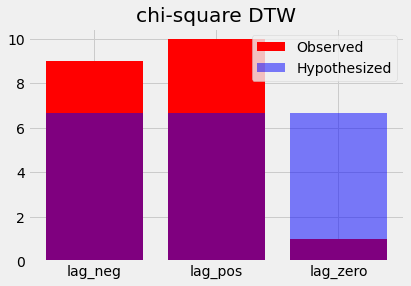

In [75]:
plt.bar(df_dtw_max_values_counts_1['dtw best path'],df_dtw_max_values_counts_1['n'], color='red', label='Observed')

plt.bar(hypothesized_dtw_1['dtw best path'], hypothesized_dtw_1['n'], alpha=0.5, color='blue', label='Hypothesized')

plt.title("chi-square DTW")
plt.legend()
plt.show

In [76]:
chisquare(f_obs=df_dtw_max_values_counts_1['n'],f_exp=hypothesized_dtw_1['n'])

Power_divergenceResult(statistic=7.300000000000001, pvalue=0.025991128778755344)

## chi-square dtw with pos_lag and neg_lag

In [77]:
df_dtw_max_values_counts=df_max_values2['dtw best path'].value_counts()

df_dtw_max_values_counts = df_dtw_max_values_counts[df_dtw_max_values_counts.index != 'lag_zero']
df_dtw_max_values_counts = df_dtw_max_values_counts.rename_axis('dtw best path') \
                                                   .reset_index(name='n') \
                                                   .sort_values('dtw best path')
df_dtw_max_values_counts

,dtw best path,n
1,lag_neg,9
0,lag_pos,10


In [78]:
hypothesized_dtw=pd.DataFrame({
    'dtw best path':['lag_neg','lag_pos'],
    'prop':[1/2,1/2]
})
hypothesized_dtw

,dtw best path,prop
0,lag_neg,0.5
1,lag_pos,0.5


In [79]:
n_total=len(df_max_values2)
hypothesized_dtw["n"]=hypothesized_dtw["prop"]*n_total
hypothesized_dtw

,dtw best path,prop,n
0,lag_neg,0.5,10.0
1,lag_pos,0.5,10.0


<function matplotlib.pyplot.show(close=None, block=None)>

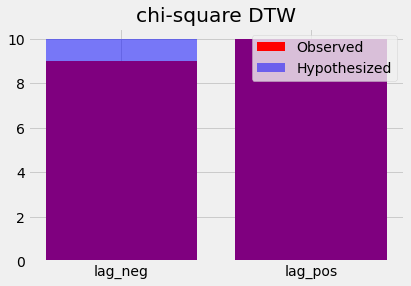

In [80]:
plt.bar(df_dtw_max_values_counts['dtw best path'],df_dtw_max_values_counts['n'], color='red', label='Observed')

plt.bar(hypothesized_dtw['dtw best path'], hypothesized_dtw['n'], alpha=0.5, color='blue', label='Hypothesized')

plt.title("chi-square DTW")
plt.legend()
plt.show

In [81]:


hypothesized_values = hypothesized_dtw['n'][::-1].repeat(len(df_dtw_max_values_counts))


hypothesized_values = hypothesized_values[:len(df_dtw_max_values_counts['n'])]


observed_freq = df_dtw_max_values_counts['n'] / df_dtw_max_values_counts['n'].sum()
expected_freq = hypothesized_values / hypothesized_values.sum()


chi2_stat, p_val = chisquare(f_obs=observed_freq, f_exp=expected_freq)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)


Chi-square statistic: 0.0027700831024930744
P-value: 0.958025455470674


# chi-square IPS

In [82]:
df_ips_max_values_counts=df_max_values2['IPS'].value_counts()
df_ips_max_values_counts

IPS
lag_neg    13
lag_pos     7
Name: count, dtype: int64

In [83]:
df_ips_max_values_counts=df_max_values2['IPS'].value_counts()


df_ips_max_values_counts = df_ips_max_values_counts.rename_axis('IPS') \
                                                   .reset_index(name='n') \
                                                   .sort_values('IPS')
df_ips_max_values_counts

,IPS,n
0,lag_neg,13
1,lag_pos,7


In [84]:
hypothesized_ips=pd.DataFrame({
    'IPS':['lag_neg','lag_pos'],
    'prop':[1/2,1/2]
})
hypothesized_ips

,IPS,prop
0,lag_neg,0.5
1,lag_pos,0.5


In [85]:
n_total=len(df_max_values2)
hypothesized_ips["n"]=hypothesized_ips["prop"]*n_total
hypothesized_ips

,IPS,prop,n
0,lag_neg,0.5,10.0
1,lag_pos,0.5,10.0


<function matplotlib.pyplot.show(close=None, block=None)>

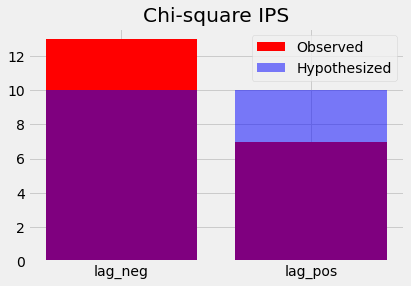

In [86]:
plt.bar(df_ips_max_values_counts['IPS'],df_ips_max_values_counts['n'], color='red', label='Observed')

plt.bar(hypothesized_ips['IPS'], hypothesized_ips['n'], alpha=0.5, color='blue', label='Hypothesized')

plt.title("Chi-square IPS")
plt.legend()
plt.show

In [87]:
chisquare(f_obs=df_ips_max_values_counts['n'],f_exp=hypothesized_ips['n'])

Power_divergenceResult(statistic=1.8, pvalue=0.17971249487899593)

# Preparação para analise da dados pre-processamento

In [88]:
df_max_values2

,dtw best path,IPS
Samsung Galaxy S22 256GB (5G),lag_pos,lag_pos
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos
Apple iPhone 11 128GB,lag_pos,lag_pos
Vivo Y22s 128GB,lag_pos,lag_neg
Apple iPhone 14 256GB,lag_zero,lag_neg
Samsung Galaxy S23 256GB,lag_pos,lag_neg
Apple iPhone 14 128GB,lag_pos,lag_neg
Apple iPhone 11 64GB,lag_neg,lag_pos
Samsung Galaxy S22 128GB (5G),lag_neg,lag_neg
Apple iPhone 14 512GB,lag_pos,lag_pos


In [89]:

different_products = []


for index, row in df_max_values2.iterrows():
    product = index  
    dtw_best_path = row['dtw best path']  
    ips = row['IPS']  
    
    
    if dtw_best_path != ips:
        different_products.append(produto)


print("Lista de produtos com valores das colunas diferentes:")
for product in different_products:
    print(product)


Lista de produtos com valores das colunas diferentes:
Apple iPhone 14 Plus 256GB 
Apple iPhone 14 Plus 256GB 
Apple iPhone 14 Plus 256GB 
Apple iPhone 14 Plus 256GB 
Apple iPhone 14 Plus 256GB 
Apple iPhone 14 Plus 256GB 


In [90]:
df_company1 =df_company1[(df_company1 != '-').all(axis=1)].dropna()
df_company1=df_company1.replace('[,]', '', regex=True)
df_company1=df_company1.replace('[\$,]', '', regex=True).astype(float)/1000
normalize_time_serie_Zscore(df_company1)
df_company1

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
2023-05-22,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-23,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-24,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-25,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-26,624.0,232.8,568.8,204.0,984.0,900.0,912.0,396.0,624.0,1168.8,1248.0,1188.0,1332.0,106.8,1128.0,804.0,1000.8,1216.8,744.0,1164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-09,552.0,216.0,568.8,150.0,897.6,840.0,865.2,442.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,732.0,1168.8
2023-12-10,552.0,216.0,568.8,150.0,897.6,840.0,865.2,442.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,732.0,1168.8
2023-12-11,552.0,216.0,568.8,150.0,897.6,840.0,865.2,442.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,732.0,1168.8
2023-12-12,552.0,216.0,568.8,150.0,897.6,840.0,865.2,430.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,744.0,1168.8


In [91]:
df_company2 = df_company2[(df_company2 != '-').all(axis=1)].dropna()
df_company2 = df_company2.replace('[,]', '', regex=True)
df_company2 = df_company2.replace('[\$,]', '', regex=True)


def convert_to_float(value):
    if isinstance(value, str) and '/' in value:
        return float(value.split('/')[0])
    else:
        return value


df_company2 = df_company2.applymap(convert_to_float).astype(float) / 1000
normalize_time_serie_Zscore(df_company2)

df_company2


/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4432/1485274425.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_company2 = df_company2.applymap(convert_to_float).astype(float) / 1000


,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
2023-02-09,899.99,299.99,549.99,229.99,1049.99,999.99,899.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-02-27,899.99,274.99,549.99,229.99,1069.99,999.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-09,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-10,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-12,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-13,899.99,274.99,549.99,229.99,1069.99,1099.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-24,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1149.99
2023-03-26,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1149.99
2023-03-27,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-04-10,899.99,274.99,529.99,229.99,979.99,1099.99,829.99,429.99,549.99,1219.99,1279.99,1999.99,1399.99,109.99,1149.99,1249.99,979.99,1279.99,749.99,1099.99


In [92]:
df_company1

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
2023-05-22,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-23,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-24,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-25,628.8,232.8,568.8,220.8,1008.0,900.0,912.0,420.0,624.0,1168.8,1272.0,1188.0,1396.8,106.8,1132.8,804.0,1000.8,1272.0,744.0,1164.0
2023-05-26,624.0,232.8,568.8,204.0,984.0,900.0,912.0,396.0,624.0,1168.8,1248.0,1188.0,1332.0,106.8,1128.0,804.0,1000.8,1216.8,744.0,1164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-09,552.0,216.0,568.8,150.0,897.6,840.0,865.2,442.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,732.0,1168.8
2023-12-10,552.0,216.0,568.8,150.0,897.6,840.0,865.2,442.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,732.0,1168.8
2023-12-11,552.0,216.0,568.8,150.0,897.6,840.0,865.2,442.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,732.0,1168.8
2023-12-12,552.0,216.0,568.8,150.0,897.6,840.0,865.2,430.8,604.8,1128.0,1156.8,1188.0,1396.8,76.8,1002.0,756.0,1044.0,1260.0,744.0,1168.8


In [93]:
df_company2

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
2023-02-09,899.99,299.99,549.99,229.99,1049.99,999.99,899.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-02-27,899.99,274.99,549.99,229.99,1069.99,999.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-09,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-10,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-12,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-13,899.99,274.99,549.99,229.99,1069.99,1099.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-24,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1149.99
2023-03-26,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1149.99
2023-03-27,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-04-10,899.99,274.99,529.99,229.99,979.99,1099.99,829.99,429.99,549.99,1219.99,1279.99,1999.99,1399.99,109.99,1149.99,1249.99,979.99,1279.99,749.99,1099.99


In [94]:
different_products

['Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ']

In [95]:
# Crie um DataFrame vazio para armazenar os valores médios
df_mean = pd.DataFrame()

# Itere sobre os produtos em comum
for product in common_products:
    # Calcule a média de cada empresa para o produto atual
    mean_wom = df_company1[product].mean()
    mean_falabella = df_company2[product].mean()
    
    # Adicione os valores médios ao DataFrame df_mean
    df_mean.loc[product, 'Wom / Loyalty'] = mean_wom
    df_mean.loc[product, 'Falabella / Loyalty'] = mean_falabella

df_mean

,Wom / Loyalty,Falabella / Loyalty
Samsung Galaxy S22 256GB (5G),611.126214,899.990000
Samsung Galaxy A23 128GB (5G),219.227204,277.073333
Apple iPhone 11 128GB,568.800000,536.656667
Vivo Y22s 128GB,178.462136,229.990000
Apple iPhone 14 256GB,923.114563,1037.490000
Samsung Galaxy S23 256GB,832.462136,1149.990000
Apple iPhone 14 128GB,835.945631,912.490000
Apple iPhone 11 64GB,423.937864,447.490000
Samsung Galaxy S22 128GB (5G),611.499029,719.990000
Apple iPhone 14 512GB,1142.306796,1361.656667


In [96]:
df_selected_2 = df_company1

variances_c1 = df_selected_2.dropna().var()



print("variância para cada produto:")
print(variances_c1)


variância para cada produto:
Samsung Galaxy S22 256GB (5G)        2.172158e+03
Samsung Galaxy A23 128GB (5G)        2.483429e+02
Apple iPhone 11 128GB                5.195098e-26
Vivo Y22s 128GB                      6.878681e+02
Apple iPhone 14 256GB                2.065113e+03
Samsung Galaxy S23 256GB             1.496165e+03
Apple iPhone 14 128GB                1.856212e+03
Apple iPhone 11 64GB                 2.599423e+02
Samsung Galaxy S22 128GB (5G)        1.480748e+02
Apple iPhone 14 512GB                7.526125e+02
Apple iPhone 14 Pro Max 128GB        1.888942e+03
Samsung Galaxy Z Fold4 256GB (5G)    0.000000e+00
Apple iPhone 14 Pro Max 256GB        2.132830e+02
Motorola Moto E22i  64GB             1.914369e+02
Apple iPhone 14 Pro 128GB            2.886670e+03
Samsung Galaxy Z Flip4 256GB (5G)    3.293143e+02
Apple iPhone 14 Plus 128GB           3.446998e+02
Apple iPhone 14 Pro 256GB            1.275336e+02
Apple iPhone 13 128GB                1.281516e+03
Apple iPhone 14 Plus 

In [97]:
df_selected_2 = df_company2
variances_c2 = df_selected_2.dropna().var()


# Imprimir as razões
print("variância para cada produto:")
print(variances_c2)


variância para cada produto:
Samsung Galaxy S22 256GB (5G)        1.409967e-26
Samsung Galaxy A23 128GB (5G)        5.208333e+01
Apple iPhone 11 128GB                3.151515e+02
Vivo Y22s 128GB                      7.931064e-27
Apple iPhone 14 256GB                3.347727e+03
Samsung Galaxy S23 256GB             6.363636e+03
Apple iPhone 14 128GB                1.238636e+03
Apple iPhone 11 64GB                 1.275000e+03
Samsung Galaxy S22 128GB (5G)        6.436364e+03
Apple iPhone 14 512GB                4.378788e+03
Apple iPhone 14 Pro Max 128GB        1.336364e+03
Samsung Galaxy Z Fold4 256GB (5G)    2.255947e-25
Apple iPhone 14 Pro Max 256GB        2.045455e+03
Motorola Moto E22i  64GB             8.333333e+00
Apple iPhone 14 Pro 128GB            4.568182e+02
Samsung Galaxy Z Flip4 256GB (5G)    1.687500e+04
Apple iPhone 14 Plus 128GB           7.363636e+02
Apple iPhone 14 Pro 256GB            5.113636e+02
Apple iPhone 13 128GB                2.475000e+03
Apple iPhone 14 Plus 

In [98]:
df_selected_dtw_best_path=df_selected_dtw_best_path

df_selected_dtw_best_path['variances_c1'] = variances_c1
df_selected_dtw_best_path['variances_c2'] = variances_c2
df_selected_dtw_best_path

/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4432/814233315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_dtw_best_path['variances_c1'] = variances_c1
/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4432/814233315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_dtw_best_path['variances_c2'] = variances_c2


,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2.172158e+03,1.409967e-26
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,2.483429e+02,5.208333e+01
Apple iPhone 11 128GB,27.586207,0.492611,71.921182,5.195098e-26,3.151515e+02
Vivo Y22s 128GB,27.594937,0.506329,71.898734,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2.065113e+03,3.347727e+03
Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120,1.496165e+03,6.363636e+03
Apple iPhone 14 128GB,1.075269,16.129032,82.795699,1.856212e+03,1.238636e+03
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,2.599423e+02,1.275000e+03
Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000,1.480748e+02,6.436364e+03
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,7.526125e+02,4.378788e+03


In [99]:
# Selecionar apenas as linhas com índices presentes em produtos_diferentes
df_selected_ips = df_percents_IPS
df_selected_ips['variances_c1'] = variances_c1
df_selected_ips['variances_c2'] = variances_c2
# Imprimir o DataFrame resultante
df_selected_ips


,lag_neg,lag_zero,lag_pos,cluster,variances_c1,variances_c2
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1,2.172158e+03,1.409967e-26
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1,2.483429e+02,5.208333e+01
Apple iPhone 11 128GB,46.078431,0.0,53.921569,1,5.195098e-26,3.151515e+02
Vivo Y22s 128GB,52.905199,0.0,47.094801,1,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0,2.065113e+03,3.347727e+03
Samsung Galaxy S23 256GB,60.983607,0.0,39.016393,0,1.496165e+03,6.363636e+03
Apple iPhone 14 128GB,58.682635,0.0,41.317365,0,1.856212e+03,1.238636e+03
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1,2.599423e+02,1.275000e+03
Samsung Galaxy S22 128GB (5G),81.081081,0.0,18.918919,0,1.480748e+02,6.436364e+03
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1,7.526125e+02,4.378788e+03


In [100]:
different_products

['Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Plus 256GB ']

In [101]:
df_company2

,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
2023-02-09,899.99,299.99,549.99,229.99,1049.99,999.99,899.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-02-27,899.99,274.99,549.99,229.99,1069.99,999.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-09,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-10,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-12,899.99,274.99,549.99,229.99,1069.99,1199.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-13,899.99,274.99,549.99,229.99,1069.99,1099.99,929.99,479.99,749.99,1389.99,1349.99,1999.99,1499.99,109.99,1199.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-03-24,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1149.99
2023-03-26,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1149.99
2023-03-27,899.99,274.99,529.99,229.99,1069.99,1199.99,929.99,399.99,749.99,1389.99,1279.99,1999.99,1499.99,109.99,1179.99,1249.99,1039.99,1329.99,859.99,1199.99
2023-04-10,899.99,274.99,529.99,229.99,979.99,1099.99,829.99,429.99,549.99,1219.99,1279.99,1999.99,1399.99,109.99,1149.99,1249.99,979.99,1279.99,749.99,1099.99


In [102]:

freq_dict = {}


for product in different_products:


    frequencies = df_company1[product].value_counts()
    

    freq_dict[product] = frequencies

df_freq1 = pd.DataFrame(freq_dict)

df_freq1


,Apple iPhone 14 Plus 256GB
Apple iPhone 14 Plus 256GB,
1168.8,156
1164.0,50


In [103]:
freq_dict = {}


for product in different_products:

    frequencies = df_company2[product].value_counts()
    

    freq_dict[product] = frequencies


df_freq2 = pd.DataFrame(freq_dict)

df_freq2


,Apple iPhone 14 Plus 256GB
Apple iPhone 14 Plus 256GB,
1199.99,7
1099.99,3
1149.99,2


In [104]:

freq_dict = {}


for product in common_products:

    frequencies = df_company1[product].value_counts()
    

    freq_dict[product] = frequencies


df_freq1 = pd.DataFrame(freq_dict)

df_freq1


,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN
76.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN
90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
106.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,NaN,NaN
1272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN
1332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:

freq_dict = {}


for product in common_products:

    
    frequencies = df_company2[product].value_counts()
    
    
    freq_dict[product] = frequencies


df_freq2 = pd.DataFrame(freq_dict)

df_freq2


,Samsung Galaxy S22 256GB (5G),Samsung Galaxy A23 128GB (5G),Apple iPhone 11 128GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy S23 256GB,Apple iPhone 14 128GB,Apple iPhone 11 64GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 14 Pro Max 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Flip4 256GB (5G),Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro 256GB,Apple iPhone 13 128GB,Apple iPhone 14 Plus 256GB
99.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
109.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
229.99,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274.99,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299.99,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489.99,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529.99,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
common_products

['Samsung Galaxy S22 256GB (5G)',
 'Samsung Galaxy A23 128GB (5G)',
 'Apple iPhone 11 128GB',
 'Vivo Y22s 128GB ',
 'Apple iPhone 14 256GB ',
 'Samsung Galaxy S23 256GB',
 'Apple iPhone 14 128GB ',
 'Apple iPhone 11 64GB',
 'Samsung Galaxy S22 128GB (5G)',
 'Apple iPhone 14 512GB',
 'Apple iPhone 14 Pro Max 128GB ',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Apple iPhone 14 Pro Max 256GB ',
 'Motorola Moto E22i  64GB',
 'Apple iPhone 14 Pro 128GB',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Pro 256GB',
 'Apple iPhone 13 128GB',
 'Apple iPhone 14 Plus 256GB ']

In [107]:
# Dados
c_yellow = ['Apple iPhone 13 128GB','Samsung Galaxy Z Fold4 256GB (5G)','Apple iPhone 11 128GB',
             'Vivo Y22s 128GB ','Apple iPhone 14 512GB', 'Samsung Galaxy Z Flip4 256GB (5G)',
             'Samsung Galaxy A23 128GB (5G)','Samsung Galaxy S23 256GB','Apple iPhone 14 128GB ',
             'Samsung Galaxy S22 256GB (5G)']

c_red = ['Apple iPhone 14 Pro 128GB', 'Samsung Galaxy S22 128GB (5G)', 'Apple iPhone 14 Pro 256GB',
              'Motorola Moto E22i  64GB','Apple iPhone 14 Pro Max 256GB ', 'Apple iPhone 14 Plus 256GB ',
              'Apple iPhone 14 Plus 128GB ','Apple iPhone 14 Pro Max 128GB ','Apple iPhone 11 64GB']

c_blue = ['Apple iPhone 14 256GB ']

dados_yellow = [df_mean['Wom / Loyalty'][product] for product in c_yellow]
dados_red = [df_mean['Wom / Loyalty'][product] for product in c_red]
dados_blue = [df_mean['Wom / Loyalty'][product] for product in c_blue]
dados_yellow_FA = [df_mean['Falabella / Loyalty'][product] for product in c_yellow]
dados_red_FA = [df_mean['Falabella / Loyalty'][product] for product in c_red]
dados_blue_FA = [df_mean['Falabella / Loyalty'][product] for product in c_blue]

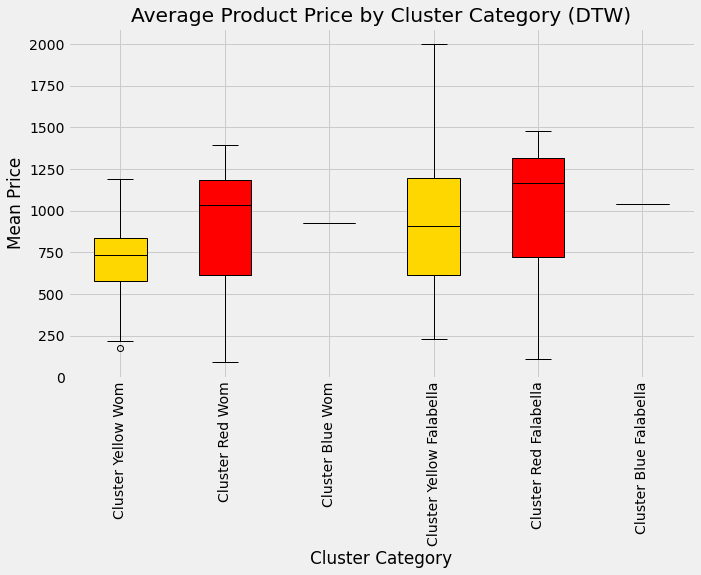

In [108]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar caixas de bigodes para todas as categorias
boxplot = plt.boxplot([dados_yellow, dados_red, dados_blue, dados_yellow_FA, dados_red_FA, dados_blue_FA], 
                      labels=['Cluster Yellow Wom', 'Cluster Red Wom', 'Cluster Blue Wom',
                              'Cluster Yellow Falabella', 'Cluster Red Falabella', 'Cluster Blue Falabella'],
                      patch_artist=True)

# Definir cores para as caixas de bigodes
cores = ['#FFD700', '#FF0000', '#0000FF', '#FFD700', '#FF0000', '#0000FF']
for i, patch in enumerate(boxplot['boxes']):
    patch.set_facecolor(cores[i])

# Definir cor da linha
for linha in boxplot['medians']:
    linha.set(color='black')  # Cor da linha

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90)

# Configurações adicionais
plt.title('Average Product Price by Cluster Category (DTW)')
plt.ylabel('Mean Price')
plt.xlabel('Cluster Category')
plt.savefig("IMG resultados 2/dtw_big.png", bbox_inches='tight')
plt.show()


In [109]:
c2_yellow = ['Apple iPhone 14 Pro 256GB','Motorola Moto E22i  64GB','Apple iPhone 14 Pro Max 256GB ', 'Apple iPhone 14 Plus 256GB ',
              'Apple iPhone 14 Plus 128GB ','Apple iPhone 11 64GB','Apple iPhone 13 128GB','Samsung Galaxy Z Fold4 256GB (5G)','Apple iPhone 11 128GB',
             'Vivo Y22s 128GB ','Apple iPhone 14 512GB', 'Samsung Galaxy Z Flip4 256GB (5G)',
             'Samsung Galaxy A23 128GB (5G)','Samsung Galaxy S23 256GB','Apple iPhone 14 128GB ',
             'Samsung Galaxy S22 256GB (5G)']

c2_red = ['Apple iPhone 14 256GB ','Apple iPhone 14 Pro Max 128GB ','Apple iPhone 14 Pro 128GB','Samsung Galaxy S22 128GB (5G)']


              
        


dados_yellow_2 = [df_mean['Wom / Loyalty'][product] for product in c2_yellow]
dados_red_2 = [df_mean['Wom / Loyalty'][product] for product in c2_red]

dados_yellow_FA_2 = [df_mean['Falabella / Loyalty'][product] for product in c2_yellow]
dados_red_FA_2 = [df_mean['Falabella / Loyalty'][product] for product in c2_red]


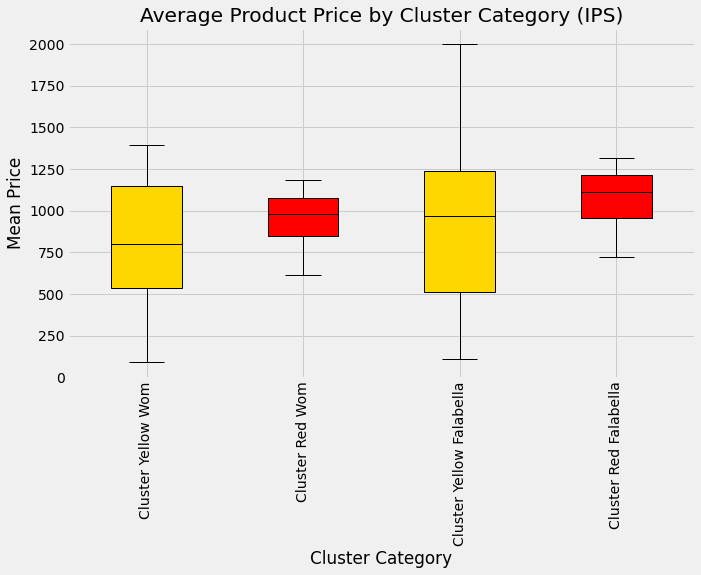

In [110]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar caixas de bigodes para todas as categorias
boxplot = plt.boxplot([dados_yellow_2, dados_red_2, dados_yellow_FA_2, dados_red_FA_2], 
                      labels=['Cluster Yellow Wom', 'Cluster Red Wom',
                              'Cluster Yellow Falabella', 'Cluster Red Falabella'],
                      patch_artist=True)

# Definir cores para as caixas de bigodes
cores = ['#FFD700', '#FF0000', '#FFD700', '#FF0000' ]
for i, patch in enumerate(boxplot['boxes']):
    patch.set_facecolor(cores[i])

# Definir cor da linha
for linha in boxplot['medians']:
    linha.set(color='black')  # Cor da linha

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90)

# Configurações adicionais
plt.title('Average Product Price by Cluster Category (IPS)')
plt.ylabel('Mean Price')
plt.xlabel('Cluster Category')
plt.savefig("IMG resultados 2/ips_big.png", bbox_inches='tight')
plt.show()


In [111]:

count_dict = {}


for product in common_products:
    
    unique_values_count = df_company1[product].nunique()
    
  
    count_dict[product] = unique_values_count


df_unique_values_count_1 = pd.DataFrame.from_dict(count_dict, orient='index', columns=['Values Count: Wom'])


print(df_unique_values_count_1)


                                   Values Count: Wom
Samsung Galaxy S22 256GB (5G)                      9
Samsung Galaxy A23 128GB (5G)                      9
Apple iPhone 11 128GB                              1
Vivo Y22s 128GB                                    4
Apple iPhone 14 256GB                              3
Samsung Galaxy S23 256GB                           5
Apple iPhone 14 128GB                              4
Apple iPhone 11 64GB                               7
Samsung Galaxy S22 128GB (5G)                      3
Apple iPhone 14 512GB                              3
Apple iPhone 14 Pro Max 128GB                      3
Samsung Galaxy Z Fold4 256GB (5G)                  1
Apple iPhone 14 Pro Max 256GB                      2
Motorola Moto E22i  64GB                           5
Apple iPhone 14 Pro 128GB                          4
Samsung Galaxy Z Flip4 256GB (5G)                  3
Apple iPhone 14 Plus 128GB                         2
Apple iPhone 14 Pro 256GB                     

In [112]:

count_dict = {}


for product in common_products:

    unique_values_count = df_company2[product].nunique()
    

    count_dict[product] = unique_values_count


df_unique_values_count_2 = pd.DataFrame.from_dict(count_dict, orient='index', columns=['Values Count: Falabella'])


print(df_unique_values_count_2)


                                   Values Count: Falabella
Samsung Galaxy S22 256GB (5G)                            1
Samsung Galaxy A23 128GB (5G)                            2
Apple iPhone 11 128GB                                    3
Vivo Y22s 128GB                                          1
Apple iPhone 14 256GB                                    5
Samsung Galaxy S23 256GB                                 3
Apple iPhone 14 128GB                                    4
Apple iPhone 11 64GB                                     3
Samsung Galaxy S22 128GB (5G)                            3
Apple iPhone 14 512GB                                    2
Apple iPhone 14 Pro Max 128GB                            2
Samsung Galaxy Z Fold4 256GB (5G)                        1
Apple iPhone 14 Pro Max 256GB                            2
Motorola Moto E22i  64GB                                 2
Apple iPhone 14 Pro 128GB                                3
Samsung Galaxy Z Flip4 256GB (5G)                       

In [113]:
df_selected_dtw_best_path

,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2.172158e+03,1.409967e-26
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,2.483429e+02,5.208333e+01
Apple iPhone 11 128GB,27.586207,0.492611,71.921182,5.195098e-26,3.151515e+02
Vivo Y22s 128GB,27.594937,0.506329,71.898734,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2.065113e+03,3.347727e+03
Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120,1.496165e+03,6.363636e+03
Apple iPhone 14 128GB,1.075269,16.129032,82.795699,1.856212e+03,1.238636e+03
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,2.599423e+02,1.275000e+03
Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000,1.480748e+02,6.436364e+03
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,7.526125e+02,4.378788e+03


In [114]:
df_selected_ips

,lag_neg,lag_zero,lag_pos,cluster,variances_c1,variances_c2
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1,2.172158e+03,1.409967e-26
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1,2.483429e+02,5.208333e+01
Apple iPhone 11 128GB,46.078431,0.0,53.921569,1,5.195098e-26,3.151515e+02
Vivo Y22s 128GB,52.905199,0.0,47.094801,1,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0,2.065113e+03,3.347727e+03
Samsung Galaxy S23 256GB,60.983607,0.0,39.016393,0,1.496165e+03,6.363636e+03
Apple iPhone 14 128GB,58.682635,0.0,41.317365,0,1.856212e+03,1.238636e+03
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1,2.599423e+02,1.275000e+03
Samsung Galaxy S22 128GB (5G),81.081081,0.0,18.918919,0,1.480748e+02,6.436364e+03
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1,7.526125e+02,4.378788e+03


In [115]:

df_selected_dtw_best_path = pd.concat([df_selected_dtw_best_path, df_unique_values_count_1, df_unique_values_count_2], axis=1)


df_selected_dtw_best_path


,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2,Values Count: Wom,Values Count: Falabella
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2.172158e+03,1.409967e-26,9,1
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,2.483429e+02,5.208333e+01,9,2
Apple iPhone 11 128GB,27.586207,0.492611,71.921182,5.195098e-26,3.151515e+02,1,3
Vivo Y22s 128GB,27.594937,0.506329,71.898734,6.878681e+02,7.931064e-27,4,1
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2.065113e+03,3.347727e+03,3,5
Samsung Galaxy S23 256GB,45.783133,1.686747,52.530120,1.496165e+03,6.363636e+03,5,3
Apple iPhone 14 128GB,1.075269,16.129032,82.795699,1.856212e+03,1.238636e+03,4,4
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,2.599423e+02,1.275000e+03,7,3
Samsung Galaxy S22 128GB (5G),100.000000,0.000000,0.000000,1.480748e+02,6.436364e+03,3,3
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,7.526125e+02,4.378788e+03,3,2


In [116]:

df_selected_ips = pd.concat([df_selected_ips, df_unique_values_count_1, df_unique_values_count_2], axis=1)


df_selected_ips

,lag_neg,lag_zero,lag_pos,cluster,variances_c1,variances_c2,Values Count: Wom,Values Count: Falabella
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1,2.172158e+03,1.409967e-26,9,1
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1,2.483429e+02,5.208333e+01,9,2
Apple iPhone 11 128GB,46.078431,0.0,53.921569,1,5.195098e-26,3.151515e+02,1,3
Vivo Y22s 128GB,52.905199,0.0,47.094801,1,6.878681e+02,7.931064e-27,4,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0,2.065113e+03,3.347727e+03,3,5
Samsung Galaxy S23 256GB,60.983607,0.0,39.016393,0,1.496165e+03,6.363636e+03,5,3
Apple iPhone 14 128GB,58.682635,0.0,41.317365,0,1.856212e+03,1.238636e+03,4,4
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1,2.599423e+02,1.275000e+03,7,3
Samsung Galaxy S22 128GB (5G),81.081081,0.0,18.918919,0,1.480748e+02,6.436364e+03,3,3
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1,7.526125e+02,4.378788e+03,3,2


In [117]:
df_selected_ips[['lag_neg', 'lag_zero', 'lag_pos', 'variances_c1', 'variances_c2', 'Values Count: Wom', 'Values Count: Falabella']]


,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2,Values Count: Wom,Values Count: Falabella
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,2.172158e+03,1.409967e-26,9,1
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,2.483429e+02,5.208333e+01,9,2
Apple iPhone 11 128GB,46.078431,0.0,53.921569,5.195098e-26,3.151515e+02,1,3
Vivo Y22s 128GB,52.905199,0.0,47.094801,6.878681e+02,7.931064e-27,4,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,2.065113e+03,3.347727e+03,3,5
Samsung Galaxy S23 256GB,60.983607,0.0,39.016393,1.496165e+03,6.363636e+03,5,3
Apple iPhone 14 128GB,58.682635,0.0,41.317365,1.856212e+03,1.238636e+03,4,4
Apple iPhone 11 64GB,46.905537,0.0,53.094463,2.599423e+02,1.275000e+03,7,3
Samsung Galaxy S22 128GB (5G),81.081081,0.0,18.918919,1.480748e+02,6.436364e+03,3,3
Apple iPhone 14 512GB,14.532872,0.0,85.467128,7.526125e+02,4.378788e+03,3,2
